In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pandas as pd

In [2]:
!pip install pickleshare

In [3]:
%cd {HOME}

[Errno 2] No such file or directory: '{HOME}'
/home/mosquitos/Documentos


In [4]:
!nvidia-smi

Sat Dec  7 13:01:58 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090        Off |   00000000:03:00.0  On |                  N/A |
|  0%   34C    P8             23W /  370W |      40MiB /  24576MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
import os
HOME = os.getcwd()
print(HOME)

/home/mosquitos/Documentos


In [6]:
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
Setup complete ✅ (20 CPUs, 31.2 GB RAM, 379.5/438.5 GB disk)


In [7]:
from ultralytics import YOLO
from IPython.display import display, Image

In [8]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow --quiet

mkdir: cannot create directory ‘/home/mosquitos/Documentos/datasets’: File exists
/home/mosquitos/Documentos/datasets


In [9]:
from roboflow import Roboflow
rf = Roboflow(api_key="Qc4C803vcThsAwQ9l4gV")
project = rf.workspace("vane").project("clasificador-de-mosquitos")
dataset = project.version(3).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [10]:
dataset.location

'/home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3'

In [11]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8l.pt data=/home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/data.yaml epochs=100 imgsz=1024 name='epoch100_yolov8l'

/home/mosquitos/Documentos
New https://pypi.org/project/ultralytics/8.3.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=epoch100_yolov8l, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, aug

In [12]:
!yolo task=detect mode=val model=runs/detect/epoch100_yolov8l/weights/best.pt data=/home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/data.yaml


Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
Model summary (fused): 268 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/va
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         28         67      0.617      0.822      0.782      0.455
                Hembra         14         37      0.643      0.826       0.77      0.404
                 Macho         14         30      0.591      0.818      0.794      0.506
Speed: 4.9ms preprocess, 22.1ms inference, 0.0ms loss, 6.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [13]:
!yolo task=detect mode=predict model=runs/detect/epoch100_yolov8l/weights/best.pt conf=0.5 source=/home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/test/images name='test_yolov8l' save=True

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
Model summary (fused): 268 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs

image 1/14 /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/test/images/IMG_1123_JPG.rf.708136560d34d1a280c2ad5a95a2af5a.jpg: 1024x1024 3 Hembras, 1 Macho, 23.5ms
image 2/14 /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/test/images/IMG_20240613_173632_591_jpg.rf.36b8d852a8e84a3d9d5826f50baf1c5d.jpg: 1024x1024 2 Hembras, 2 Machos, 23.5ms
image 3/14 /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/test/images/IMG_20240613_180314_795_jpg.rf.4a6b4a0e596878370b2babdef335b618.jpg: 1024x1024 2 Machos, 23.4ms
image 4/14 /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/test/images/IMG_20240613_180335_593_jpg.rf.a0e4c61e3c8c1d8c9b08204aa48dfd3d.jpg: 1024x1024 2 Machos, 23.4ms
image 5/14 /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/test/

In [14]:
!pip install optuna

In [15]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install --upgrade torch

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch    
 
torch.cuda.empty_cache()    
torch.cuda.reset_peak_memory_stats()    

In [3]:
import optuna
from ultralytics import YOLO


In [4]:
def objective(trial):
    lr0 = trial.suggest_loguniform('lr0', 1e-5, 1e-2)
    momentum = trial.suggest_uniform('momentum', 0.6, 0.98)
    epochs = trial.suggest_int('epochs', 10, 100)
    imgsz = trial.suggest_categorical('imgsz', [320, 640, 1280])

    model = YOLO("yolov8l.pt")

    results = model.train(
        data="/home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/data.yaml",
        epochs=epochs,
        imgsz=imgsz,
        lr0=lr0,
        momentum=momentum,
        batch=8,
        amp=True,
        name=f"trial_{trial.number}"
    )
    
    val_map = results.results_dict.get('metrics/mAP50(B)', None)
    if val_map is None:
        raise ValueError("La métrica 'metrics/mAP50(B)' no está disponible.")

    return val_map


In [5]:
optuna.logging.set_verbosity(optuna.logging.INFO)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", study.best_params)

[I 2024-12-07 19:53:52,046] A new study created in memory with name: no-name-63ac576e-2458-44db-96bd-cb04ba4897e1
/tmp/ipykernel_3916813/3157729177.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr0 = trial.suggest_loguniform('lr0', 1e-5, 1e-2)
/tmp/ipykernel_3916813/3157729177.py:3: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  momentum = trial.suggest_uniform('momentum', 0.6, 0.98)


New https://pypi.org/project/ultralytics/8.3.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/data.yaml, epochs=80, time=None, patience=100, batch=8, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=trial_0, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes

E0000 00:00:1733612033.271234 3916813 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733612033.286414 3916813 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

train: Scanning /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/train/labels.cache... 294 images, 0 backgrounds, 0 corrupt: 100%|██████████| 294/294 [00:00<?, ?it/s]
val: Scanning /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/valid/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<?, ?it/s]


Plotting labels to runs/detect/trial_0/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001883507308852371' and 'momentum=0.8542516858187104' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 8 dataloader workers
Logging results to runs/detect/trial_0
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      2.49G      2.113       2.98       1.87         19        320: 100%|██████████| 37/37 [00:05<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.10it/s]

                   all         28         67     0.0416      0.436     0.0286    0.00881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      2.19G      1.961      2.298       1.85         29        320: 100%|██████████| 37/37 [00:04<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.79it/s]

                   all         28         67    0.00186      0.164    0.00131   0.000357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80      2.15G       2.06      2.233      1.972         21        320: 100%|██████████| 37/37 [00:04<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.52it/s]

                   all         28         67   9.51e-05     0.0135   0.000115   1.15e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80       2.2G      2.089      2.025       1.93         24        320: 100%|██████████| 37/37 [00:04<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.57it/s]


                   all         28         67    0.00152      0.124    0.00114   0.000284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      2.15G      1.981      1.932      1.856         32        320: 100%|██████████| 37/37 [00:04<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.09it/s]

                   all         28         67    0.00152      0.124    0.00114   0.000284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      2.15G      1.854      1.814       1.77         18        320: 100%|██████████| 37/37 [00:04<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.38it/s]

                   all         28         67    0.00611      0.077    0.00242   0.000568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      2.12G      1.868      1.815       1.79         18        320: 100%|██████████| 37/37 [00:04<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.09it/s]


                   all         28         67      0.221      0.191      0.134     0.0638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      2.15G      1.889       1.74      1.803         23        320: 100%|██████████| 37/37 [00:04<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.43it/s]

                   all         28         67      0.387      0.696      0.432      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80       2.2G      1.804       1.67      1.711         19        320: 100%|██████████| 37/37 [00:04<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.13it/s]

                   all         28         67       0.29      0.657       0.34      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      2.15G      1.868      1.647      1.773         29        320: 100%|██████████| 37/37 [00:04<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.84it/s]


                   all         28         67      0.437      0.704      0.492      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      2.15G      1.773      1.596      1.704         21        320: 100%|██████████| 37/37 [00:05<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.90it/s]

                   all         28         67     0.0786      0.106     0.0432      0.013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      2.15G      1.791      1.597      1.693         35        320: 100%|██████████| 37/37 [00:04<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.54it/s]

                   all         28         67      0.421       0.67      0.443      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80      2.15G      1.679      1.509      1.641         34        320: 100%|██████████| 37/37 [00:04<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.04it/s]

                   all         28         67       0.43      0.636      0.402      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      2.14G      1.747      1.498      1.658         37        320: 100%|██████████| 37/37 [00:05<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.00it/s]

                   all         28         67      0.406      0.866       0.51      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      2.12G      1.707      1.482      1.648         27        320: 100%|██████████| 37/37 [00:04<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.00it/s]

                   all         28         67      0.419      0.826       0.44      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      2.18G      1.688      1.484      1.634         23        320: 100%|██████████| 37/37 [00:04<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.72it/s]

                   all         28         67      0.381      0.675      0.433      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80      2.15G      1.686      1.476       1.61         26        320: 100%|██████████| 37/37 [00:04<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.01it/s]

                   all         28         67      0.328      0.896      0.399      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80      2.15G      1.613      1.457      1.583         33        320: 100%|██████████| 37/37 [00:04<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.26it/s]

                   all         28         67      0.445      0.856      0.558      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      2.15G      1.628      1.481      1.619         24        320: 100%|██████████| 37/37 [00:04<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.62it/s]

                   all         28         67      0.423      0.818      0.525      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      2.15G      1.582      1.443      1.575         21        320: 100%|██████████| 37/37 [00:04<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.99it/s]

                   all         28         67      0.395      0.718      0.479      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      2.15G      1.618      1.429      1.583         14        320: 100%|██████████| 37/37 [00:04<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.87it/s]

                   all         28         67      0.384      0.834       0.52      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      2.18G      1.608      1.381      1.573         26        320: 100%|██████████| 37/37 [00:04<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.01it/s]

                   all         28         67      0.391      0.644      0.456      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80      2.12G      1.554       1.35      1.557         27        320: 100%|██████████| 37/37 [00:04<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.08it/s]

                   all         28         67      0.421      0.798       0.48      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      2.19G      1.604      1.368      1.582         16        320: 100%|██████████| 37/37 [00:04<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.52it/s]

                   all         28         67      0.414      0.872      0.491      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80      2.16G      1.591      1.392      1.588         24        320: 100%|██████████| 37/37 [00:04<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.14it/s]


                   all         28         67      0.464      0.777      0.564      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      2.19G      1.593      1.352      1.581         26        320: 100%|██████████| 37/37 [00:04<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.05it/s]

                   all         28         67      0.467      0.815      0.554      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      2.15G      1.568      1.344      1.534         18        320: 100%|██████████| 37/37 [00:04<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.06it/s]

                   all         28         67      0.419      0.822      0.489      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80      2.15G      1.546      1.316      1.523         21        320: 100%|██████████| 37/37 [00:04<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.50it/s]

                   all         28         67      0.389      0.899      0.513       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80      2.15G       1.54      1.322      1.534         21        320: 100%|██████████| 37/37 [00:05<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.90it/s]

                   all         28         67      0.466      0.832      0.633      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      2.15G      1.477      1.317       1.51         40        320: 100%|██████████| 37/37 [00:04<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.10it/s]


                   all         28         67      0.464      0.809      0.538      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      2.12G      1.585      1.331      1.553         22        320: 100%|██████████| 37/37 [00:04<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.44it/s]

                   all         28         67      0.402      0.869       0.55      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      2.15G      1.514      1.304      1.538         28        320: 100%|██████████| 37/37 [00:04<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.58it/s]

                   all         28         67      0.431      0.869       0.61      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      2.15G      1.483      1.278      1.499         34        320: 100%|██████████| 37/37 [00:04<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.04it/s]


                   all         28         67      0.494      0.855      0.607      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      2.16G      1.447      1.258      1.475         11        320: 100%|██████████| 37/37 [00:04<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.05it/s]

                   all         28         67      0.438      0.904      0.608      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      2.15G      1.402      1.253      1.448         39        320: 100%|██████████| 37/37 [00:04<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.69it/s]


                   all         28         67      0.455      0.923      0.608      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80      2.19G      1.455      1.242      1.485         23        320: 100%|██████████| 37/37 [00:04<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.05it/s]

                   all         28         67      0.475       0.87      0.534       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      2.15G      1.432      1.236      1.487         39        320: 100%|██████████| 37/37 [00:04<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.63it/s]

                   all         28         67      0.453      0.876      0.506      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      2.15G      1.402      1.232       1.45         37        320: 100%|██████████| 37/37 [00:04<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.42it/s]

                   all         28         67      0.418      0.832      0.469      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      2.11G      1.443      1.277      1.512         31        320: 100%|██████████| 37/37 [00:04<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.59it/s]

                   all         28         67      0.429      0.896      0.552      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      2.14G      1.455      1.257      1.482         34        320: 100%|██████████| 37/37 [00:04<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.86it/s]


                   all         28         67       0.41      0.845      0.505      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      2.15G      1.403      1.215      1.451         19        320: 100%|██████████| 37/37 [00:04<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.72it/s]

                   all         28         67      0.429      0.843      0.565      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      2.15G      1.401      1.204      1.427         26        320: 100%|██████████| 37/37 [00:04<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.19it/s]


                   all         28         67      0.456      0.845       0.56      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      2.15G       1.38      1.184      1.442         24        320: 100%|██████████| 37/37 [00:04<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.82it/s]

                   all         28         67      0.474      0.863      0.614       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      2.15G      1.363      1.223      1.438         19        320: 100%|██████████| 37/37 [00:04<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.40it/s]

                   all         28         67      0.419      0.916       0.51      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      2.19G      1.373      1.177      1.423         26        320: 100%|██████████| 37/37 [00:04<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.52it/s]

                   all         28         67      0.418      0.935      0.517      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      2.15G      1.403      1.185      1.454         22        320: 100%|██████████| 37/37 [00:04<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.25it/s]

                   all         28         67       0.47      0.872      0.607      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      2.12G      1.402      1.196      1.467         19        320: 100%|██████████| 37/37 [00:04<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.64it/s]

                   all         28         67      0.448      0.932       0.55       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      2.15G       1.34      1.175      1.439         23        320: 100%|██████████| 37/37 [00:04<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.88it/s]

                   all         28         67       0.44      0.869      0.515      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      2.15G      1.271      1.136      1.391         19        320: 100%|██████████| 37/37 [00:04<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.48it/s]

                   all         28         67      0.436      0.803      0.515       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80      2.14G      1.294      1.111      1.392         45        320: 100%|██████████| 37/37 [00:04<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.70it/s]

                   all         28         67      0.448      0.838      0.548      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80      2.15G      1.371      1.125      1.449         21        320: 100%|██████████| 37/37 [00:04<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.51it/s]

                   all         28         67      0.503      0.715      0.611      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80      2.15G      1.294      1.107        1.4         22        320: 100%|██████████| 37/37 [00:04<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.92it/s]

                   all         28         67       0.52      0.737      0.587      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      2.14G      1.286      1.095      1.405         28        320: 100%|██████████| 37/37 [00:04<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.95it/s]

                   all         28         67      0.441      0.895      0.581      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      2.14G      1.305       1.11      1.418         18        320: 100%|██████████| 37/37 [00:05<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.13it/s]


                   all         28         67      0.526       0.73      0.608       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      2.11G      1.277      1.066      1.395         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.12it/s]


                   all         28         67      0.504      0.731      0.598      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      2.15G      1.256      1.043      1.367         17        320: 100%|██████████| 37/37 [00:04<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.13it/s]


                   all         28         67      0.503      0.843      0.652      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80      2.15G      1.262      1.078      1.376         25        320: 100%|██████████| 37/37 [00:04<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.41it/s]

                   all         28         67      0.565      0.843       0.68      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      2.14G       1.22      1.024      1.372         24        320: 100%|██████████| 37/37 [00:05<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.04it/s]


                   all         28         67      0.525      0.771      0.608      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      2.15G      1.257      1.036      1.363         24        320: 100%|██████████| 37/37 [00:04<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.22it/s]

                   all         28         67      0.512      0.857      0.602       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      2.15G      1.221          1      1.371         17        320: 100%|██████████| 37/37 [00:04<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.51it/s]

                   all         28         67      0.504      0.879      0.602      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      2.15G      1.189     0.9824      1.355         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.53it/s]

                   all         28         67      0.501      0.866      0.618       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      2.19G      1.184     0.9616      1.329         17        320: 100%|██████████| 37/37 [00:04<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.11it/s]


                   all         28         67      0.484      0.833      0.608      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      2.12G       1.24      0.988      1.386         31        320: 100%|██████████| 37/37 [00:04<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.88it/s]

                   all         28         67      0.528      0.755      0.635      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80      2.15G        1.2     0.9413      1.339         19        320: 100%|██████████| 37/37 [00:05<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.21it/s]

                   all         28         67      0.497      0.846      0.592      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      2.14G      1.203     0.9293      1.345         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.69it/s]

                   all         28         67       0.52      0.739      0.625      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      2.15G      1.184     0.9138      1.323         39        320: 100%|██████████| 37/37 [00:04<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.87it/s]

                   all         28         67      0.542       0.89      0.695      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      2.15G      1.174     0.8654      1.305         15        320: 100%|██████████| 37/37 [00:04<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.44it/s]

                   all         28         67      0.514      0.909       0.71      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      2.15G      1.128     0.8623      1.305         31        320: 100%|██████████| 37/37 [00:04<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.98it/s]

                   all         28         67      0.525      0.843      0.705      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      2.14G      1.146      0.863      1.331         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.71it/s]

                   all         28         67      0.532      0.915      0.632      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80      2.14G      1.162     0.8644       1.32         24        320: 100%|██████████| 37/37 [00:04<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.83it/s]

                   all         28         67      0.546      0.847      0.697      0.407


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      2.11G      1.007     0.7651      1.252          9        320: 100%|██████████| 37/37 [00:05<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.46it/s]

                   all         28         67      0.552      0.882      0.731      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      2.14G      1.013     0.7456      1.258         16        320: 100%|██████████| 37/37 [00:04<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.46it/s]

                   all         28         67      0.554      0.869      0.687      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      2.15G      1.001     0.7397      1.258         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.60it/s]

                   all         28         67      0.601      0.802      0.707      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      2.15G     0.9726     0.7041      1.216         17        320: 100%|██████████| 37/37 [00:05<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.38it/s]

                   all         28         67      0.604      0.713      0.684      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      2.15G      0.961     0.6702      1.205         20        320: 100%|██████████| 37/37 [00:04<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.88it/s]


                   all         28         67      0.544      0.909      0.697      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      2.14G     0.9855     0.6893      1.226         20        320: 100%|██████████| 37/37 [00:04<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.17it/s]


                   all         28         67      0.545      0.877      0.694      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80      2.15G     0.9476     0.6697      1.196         11        320: 100%|██████████| 37/37 [00:04<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.05it/s]

                   all         28         67       0.55      0.882      0.694      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      2.15G     0.9268     0.6342      1.198         12        320: 100%|██████████| 37/37 [00:04<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.12it/s]

                   all         28         67      0.521      0.828      0.673       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      2.11G     0.9332       0.64      1.186         13        320: 100%|██████████| 37/37 [00:04<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.65it/s]

                   all         28         67      0.527      0.887      0.665      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      2.15G     0.9129     0.5978      1.192         10        320: 100%|██████████| 37/37 [00:04<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.46it/s]

                   all         28         67       0.54      0.862      0.678      0.389



80 epochs completed in 0.145 hours.
Optimizer stripped from runs/detect/trial_0/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/trial_0/weights/best.pt, 87.6MB

Validating runs/detect/trial_0/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
Model summary (fused): 268 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]


                   all         28         67      0.557      0.882      0.731      0.425
                Hembra         14         37       0.52      0.865      0.742      0.371
                 Macho         14         30      0.594        0.9      0.719      0.479
Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 9.4ms postprocess per image
Results saved to runs/detect/trial_0


[I 2024-12-07 20:02:52,445] Trial 0 finished with value: 0.7305968896259576 and parameters: {'lr0': 0.0001883507308852371, 'momentum': 0.8542516858187104, 'epochs': 80, 'imgsz': 320}. Best is trial 0 with value: 0.7305968896259576.


New https://pypi.org/project/ultralytics/8.3.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/data.yaml, epochs=79, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=trial_1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes

train: Scanning /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/train/labels.cache... 294 images, 0 backgrounds, 0 corrupt: 100%|██████████| 294/294 [00:00<?, ?it/s]
val: Scanning /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/valid/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<?, ?it/s]


Plotting labels to runs/detect/trial_1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0021447532508573368' and 'momentum=0.9285864885404784' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/trial_1
Starting training for 79 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/79      5.76G      2.252      4.389      2.366         19        640: 100%|██████████| 37/37 [00:06<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         28         67    0.00665      0.636    0.00772    0.00272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/79      5.62G      2.186      3.096      2.409         29        640: 100%|██████████| 37/37 [00:05<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]

                   all         28         67    0.00665      0.636    0.00772    0.00272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/79      5.65G      2.157      2.934      2.484         21        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]

                   all         28         67   0.000308     0.0833   0.000357   0.000152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/79      5.61G      2.111      2.692      2.258         24        640: 100%|██████████| 37/37 [00:05<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         28         67    0.00143      0.181    0.00118    0.00029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/79      5.63G      2.066      2.545       2.28         32        640: 100%|██████████| 37/37 [00:05<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all         28         67      0.108      0.264     0.0776     0.0328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/79      5.63G      1.994      2.254      2.122         18        640: 100%|██████████| 37/37 [00:05<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]

                   all         28         67      0.141       0.05     0.0628     0.0191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/79      5.47G      1.946        2.3      2.117         18        640: 100%|██████████| 37/37 [00:05<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all         28         67      0.346      0.385      0.314      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/79      5.62G      1.927      2.191      2.126         23        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]

                   all         28         67      0.337      0.544       0.31      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/79      5.63G      1.858      2.058      2.032         19        640: 100%|██████████| 37/37 [00:05<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         28         67      0.112      0.144     0.0782     0.0377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/79      5.62G      1.879      2.045      2.048         29        640: 100%|██████████| 37/37 [00:05<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.28it/s]

                   all         28         67      0.301      0.434      0.323      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/79      5.62G      1.794      2.004      1.985         21        640: 100%|██████████| 37/37 [00:05<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         28         67      0.424      0.657      0.411       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/79      5.62G      1.852      1.948      1.984         35        640: 100%|██████████| 37/37 [00:05<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]

                   all         28         67       0.31      0.645      0.345       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/79      5.65G      1.748      1.844      1.912         34        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all         28         67      0.378      0.624      0.402      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/79      5.64G      1.796      1.842      1.935         37        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         28         67      0.441      0.589      0.491       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/79      5.48G      1.766        1.8       1.95         27        640: 100%|██████████| 37/37 [00:05<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.01it/s]

                   all         28         67      0.334      0.638      0.398      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/79      5.64G      1.768      1.792      1.878         24        640: 100%|██████████| 37/37 [00:05<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         28         67      0.379      0.724      0.506      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/79      5.63G      1.781      1.793      1.919         26        640: 100%|██████████| 37/37 [00:05<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]

                   all         28         67      0.359      0.647      0.388      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/79      5.62G       1.73      1.741      1.889         33        640: 100%|██████████| 37/37 [00:05<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         28         67      0.361      0.685      0.429      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/79      5.63G      1.719      1.747      1.877         24        640: 100%|██████████| 37/37 [00:05<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all         28         67      0.364      0.752      0.429      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/79      5.65G      1.696      1.717      1.857         21        640: 100%|██████████| 37/37 [00:05<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all         28         67      0.419      0.906      0.509       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/79      5.64G      1.657      1.648      1.816         14        640: 100%|██████████| 37/37 [00:05<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all         28         67      0.431      0.865      0.552      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/79      5.65G      1.623      1.606      1.755         26        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         28         67      0.405      0.946      0.524      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/79      5.49G      1.611      1.591      1.783         27        640: 100%|██████████| 37/37 [00:05<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all         28         67      0.421      0.872       0.53      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/79      5.67G      1.626      1.592      1.793         15        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.04it/s]

                   all         28         67      0.442      0.821      0.534      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/79      5.64G      1.621      1.587      1.803         24        640: 100%|██████████| 37/37 [00:05<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all         28         67      0.453      0.755       0.52      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/79      5.66G      1.594      1.556      1.761         26        640: 100%|██████████| 37/37 [00:05<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         28         67      0.466      0.846      0.521      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/79      5.63G      1.623      1.535      1.762         18        640: 100%|██████████| 37/37 [00:05<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         28         67      0.438      0.802      0.509      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/79      5.64G      1.566      1.511      1.727         21        640: 100%|██████████| 37/37 [00:05<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         28         67      0.436      0.886      0.569      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/79      5.65G      1.566      1.533      1.736         21        640: 100%|██████████| 37/37 [00:05<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all         28         67      0.411      0.889      0.568      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/79      5.63G      1.497      1.466      1.692         40        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         28         67      0.393       0.82      0.472      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/79      5.48G      1.548      1.502      1.728         22        640: 100%|██████████| 37/37 [00:05<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all         28         67      0.443      0.766      0.482      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/79      5.67G      1.555      1.457      1.719         28        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]

                   all         28         67      0.447      0.876      0.526      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/79      5.67G      1.496      1.436      1.682         34        640: 100%|██████████| 37/37 [00:05<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all         28         67      0.451      0.866      0.514      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/79      5.64G       1.49      1.406      1.689         10        640: 100%|██████████| 37/37 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.45it/s]

                   all         28         67      0.428      0.893      0.511      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/79      5.63G      1.479      1.401      1.682         39        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all         28         67      0.444       0.81      0.524      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/79      5.61G      1.486      1.396      1.665         23        640: 100%|██████████| 37/37 [00:05<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         28         67      0.459      0.943       0.51       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/79      5.62G      1.471      1.395      1.648         39        640: 100%|██████████| 37/37 [00:05<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.43it/s]

                   all         28         67      0.408      0.943      0.487      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/79      5.62G      1.431        1.4      1.624         37        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]

                   all         28         67      0.412      0.807      0.505      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/79      5.47G       1.48      1.405      1.704         31        640: 100%|██████████| 37/37 [00:05<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]

                   all         28         67      0.443      0.842      0.488      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/79      5.63G      1.492      1.407      1.696         34        640: 100%|██████████| 37/37 [00:05<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.64it/s]

                   all         28         67      0.434      0.896      0.483       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/79      5.64G       1.42      1.353       1.64         19        640: 100%|██████████| 37/37 [00:05<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         28         67      0.436      0.839      0.485      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/79      5.63G      1.459      1.367      1.663         26        640: 100%|██████████| 37/37 [00:05<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all         28         67      0.447       0.89      0.507      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/79      5.65G      1.429       1.35      1.637         24        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         28         67      0.454      0.929      0.486      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/79      5.64G      1.385      1.335      1.621         19        640: 100%|██████████| 37/37 [00:05<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         28         67      0.465      0.899      0.485      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/79      5.64G      1.378      1.311      1.594         26        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all         28         67      0.434      0.926      0.471      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/79      5.62G      1.416      1.331      1.626         22        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         28         67      0.419      0.839      0.487      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/79      5.49G      1.435      1.329      1.653         19        640: 100%|██████████| 37/37 [00:05<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]

                   all         28         67      0.427      0.896      0.482       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/79      5.66G      1.368      1.311      1.612         23        640: 100%|██████████| 37/37 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         28         67      0.444      0.929      0.534      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/79      5.62G      1.308      1.286      1.545         19        640: 100%|██████████| 37/37 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         28         67      0.468      0.876       0.61      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/79      5.64G      1.321      1.266      1.539         45        640: 100%|██████████| 37/37 [00:05<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]

                   all         28         67      0.462      0.805      0.587       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/79      5.65G       1.39      1.292      1.598         21        640: 100%|██████████| 37/37 [00:05<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all         28         67      0.435      0.909      0.515      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/79      5.66G      1.334      1.282      1.565         22        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all         28         67      0.457      0.956      0.482      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/79      5.65G      1.333      1.301      1.573         28        640: 100%|██████████| 37/37 [00:05<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         28         67      0.441      0.913      0.496      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/79      5.67G      1.367      1.301      1.599         18        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]

                   all         28         67      0.449      0.912      0.524      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/79      5.49G      1.321      1.249      1.553         18        640: 100%|██████████| 37/37 [00:05<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all         28         67      0.476      0.923      0.516      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/79      5.65G      1.304      1.236      1.545         17        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.43it/s]

                   all         28         67      0.457      0.929      0.528      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/79      5.63G      1.315      1.269      1.549         25        640: 100%|██████████| 37/37 [00:05<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.20it/s]

                   all         28         67      0.453       0.94      0.561      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/79      5.63G      1.291      1.237      1.547         24        640: 100%|██████████| 37/37 [00:05<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]

                   all         28         67      0.436      0.876      0.509      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/79      5.63G      1.289      1.258      1.514         24        640: 100%|██████████| 37/37 [00:05<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]

                   all         28         67      0.465        0.9      0.585      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/79      5.64G      1.256      1.219      1.502         17        640: 100%|██████████| 37/37 [00:05<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         28         67      0.453      0.896      0.596       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/79      5.64G      1.241      1.211       1.49         18        640: 100%|██████████| 37/37 [00:05<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         28         67      0.468      0.929      0.495      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/79      5.62G      1.229      1.177       1.48         17        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         28         67      0.419      0.926      0.485      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/79      5.47G      1.261      1.215      1.512         30        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all         28         67      0.442      0.883      0.495      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/79      5.64G      1.244      1.196      1.509         19        640: 100%|██████████| 37/37 [00:05<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all         28         67      0.464      0.855       0.52      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/79      5.63G      1.217       1.18      1.506         18        640: 100%|██████████| 37/37 [00:05<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all         28         67      0.452      0.879      0.523      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/79      5.66G      1.199      1.154      1.472         39        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all         28         67      0.476      0.921      0.535      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/79      5.65G      1.213      1.143      1.473         15        640: 100%|██████████| 37/37 [00:05<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]

                   all         28         67      0.458      0.873      0.551      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/79      5.62G      1.159      1.131      1.442         32        640: 100%|██████████| 37/37 [00:05<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all         28         67       0.46      0.876      0.537       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/79      5.63G      1.197      1.128      1.486         18        640: 100%|██████████| 37/37 [00:05<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         28         67      0.465      0.893      0.572      0.305


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/79      5.65G      1.105      1.021      1.419         11        640: 100%|██████████| 37/37 [00:06<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]

                   all         28         67       0.44      0.885      0.525      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/79      5.47G       1.08      1.015      1.419          9        640: 100%|██████████| 37/37 [00:05<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]

                   all         28         67      0.432      0.896      0.519      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/79      5.65G      1.068      1.007      1.399         16        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all         28         67      0.438      0.926      0.519      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/79      5.63G      1.052     0.9861      1.364         17        640: 100%|██████████| 37/37 [00:05<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all         28         67      0.459       0.94      0.531      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/79      5.65G      1.018     0.9606      1.359         19        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         28         67      0.431      0.903      0.486      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/79      5.63G      1.036     0.9564      1.371         20        640: 100%|██████████| 37/37 [00:05<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]

                   all         28         67      0.433      0.906      0.513      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/79      5.64G      1.017     0.9615      1.343         19        640: 100%|██████████| 37/37 [00:05<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         28         67      0.424      0.909      0.512      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/79      5.65G     0.9674     0.9365      1.326         11        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.64it/s]

                   all         28         67      0.428      0.923      0.533      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/79      5.62G     0.9754     0.9275      1.319         12        640: 100%|██████████| 37/37 [00:05<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.69it/s]

                   all         28         67      0.424      0.923      0.533      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/79       5.5G     0.9778     0.9238      1.338         13        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.13it/s]

                   all         28         67      0.427      0.883      0.525      0.292



79 epochs completed in 0.201 hours.
Optimizer stripped from runs/detect/trial_1/weights/last.pt, 87.7MB
Optimizer stripped from runs/detect/trial_1/weights/best.pt, 87.7MB

Validating runs/detect/trial_1/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
Model summary (fused): 268 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.14it/s]


                   all         28         67      0.462      0.805      0.589      0.331
                Hembra         14         37      0.426      0.811      0.571      0.286
                 Macho         14         30      0.498        0.8      0.608      0.375
Speed: 0.1ms preprocess, 5.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/trial_1


[I 2024-12-07 20:15:11,366] Trial 1 finished with value: 0.5892291104135172 and parameters: {'lr0': 0.0021447532508573368, 'momentum': 0.9285864885404784, 'epochs': 79, 'imgsz': 640}. Best is trial 0 with value: 0.7305968896259576.


New https://pypi.org/project/ultralytics/8.3.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/data.yaml, epochs=87, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=trial_2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes

train: Scanning /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/train/labels.cache... 294 images, 0 backgrounds, 0 corrupt: 100%|██████████| 294/294 [00:00<?, ?it/s]
val: Scanning /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/valid/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<?, ?it/s]


Plotting labels to runs/detect/trial_2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.00038534257386399354' and 'momentum=0.7035675746543611' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/trial_2
Starting training for 87 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/87      5.74G      2.252      4.389      2.366         19        640: 100%|██████████| 37/37 [00:06<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.65it/s]

                   all         28         67    0.00665      0.636    0.00772    0.00272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/87      5.67G      2.187      3.132      2.424         29        640: 100%|██████████| 37/37 [00:05<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]

                   all         28         67    0.00012     0.0333   6.84e-05    3.7e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/87      5.67G      2.264      3.028      2.543         21        640: 100%|██████████| 37/37 [00:05<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.18it/s]

                   all         28         67    0.00012     0.0333   6.84e-05    3.7e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/87      5.62G      2.097      2.804      2.398         24        640: 100%|██████████| 37/37 [00:05<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         28         67   0.000108     0.0167   5.78e-05   2.89e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/87      5.66G       2.05      2.566      2.349         32        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         28         67    0.00216     0.0135   0.000282   8.47e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/87      5.64G      2.086       2.45      2.287         18        640: 100%|██████████| 37/37 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         28         67     0.0141     0.0135    0.00155   0.000278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/87       5.5G      1.996       2.33       2.27         18        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.18it/s]

                   all         28         67      0.338      0.258      0.212     0.0829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/87      5.67G      1.959      2.221       2.17         23        640: 100%|██████████| 37/37 [00:05<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]

                   all         28         67      0.282      0.572      0.297      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/87      5.66G      1.913      2.143       2.15         19        640: 100%|██████████| 37/37 [00:05<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         28         67      0.147     0.0541     0.0618     0.0196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/87      5.65G      1.977      2.158      2.194         29        640: 100%|██████████| 37/37 [00:05<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]

                   all         28         67      0.248      0.393      0.243      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/87      5.64G      1.892      2.063      2.133         21        640: 100%|██████████| 37/37 [00:05<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all         28         67       0.33      0.373      0.296       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/87      5.65G      1.904      2.006      2.114         35        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.45it/s]

                   all         28         67      0.268      0.471      0.285      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/87      5.64G      1.797      1.907      1.999         34        640: 100%|██████████| 37/37 [00:05<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         28         67      0.398      0.611      0.397      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/87      5.64G      1.791      1.861       1.97         37        640: 100%|██████████| 37/37 [00:05<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]

                   all         28         67      0.412      0.471      0.445      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/87      5.52G      1.754      1.812      1.971         27        640: 100%|██████████| 37/37 [00:05<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all         28         67      0.392      0.494      0.377      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/87      5.67G      1.724      1.822      1.945         24        640: 100%|██████████| 37/37 [00:05<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.64it/s]

                   all         28         67      0.349      0.742      0.419      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/87      5.66G      1.778      1.788      1.973         26        640: 100%|██████████| 37/37 [00:05<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         28         67      0.361      0.782      0.437      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/87      5.64G      1.739      1.759      1.911         33        640: 100%|██████████| 37/37 [00:05<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]

                   all         28         67      0.325      0.544      0.318      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/87      5.64G      1.724      1.745       1.93         24        640: 100%|██████████| 37/37 [00:05<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all         28         67       0.35      0.741      0.404      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/87      5.66G      1.688      1.683      1.904         21        640: 100%|██████████| 37/37 [00:05<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         28         67      0.375      0.716      0.472      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/87      5.64G       1.68      1.643      1.884         14        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]

                   all         28         67      0.444      0.788      0.505      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/87      5.65G       1.61      1.616       1.82         26        640: 100%|██████████| 37/37 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]

                   all         28         67      0.416      0.772       0.47      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/87      5.51G      1.597      1.586       1.83         27        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         28         67      0.403      0.812      0.491      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/87      5.69G       1.63      1.592      1.832         15        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         28         67      0.445      0.889      0.533      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/87      5.67G      1.653      1.593      1.836         24        640: 100%|██████████| 37/37 [00:05<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all         28         67        0.4      0.848      0.475      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/87      5.65G       1.59       1.58      1.801         26        640: 100%|██████████| 37/37 [00:05<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         28         67      0.469       0.86      0.543      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/87      5.64G      1.587      1.554      1.784         18        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all         28         67      0.416      0.793      0.521      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/87      5.66G      1.543       1.53      1.774         21        640: 100%|██████████| 37/37 [00:05<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         28         67      0.394      0.872       0.52      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/87      5.65G      1.554      1.524      1.784         21        640: 100%|██████████| 37/37 [00:05<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         28         67      0.438      0.801      0.568      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/87      5.64G      1.533      1.515      1.786         40        640: 100%|██████████| 37/37 [00:05<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]

                   all         28         67      0.426      0.732      0.485      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/87      5.52G      1.572       1.55      1.805         22        640: 100%|██████████| 37/37 [00:05<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.69it/s]

                   all         28         67      0.434      0.801      0.535      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/87      5.65G      1.555       1.49      1.796         28        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all         28         67      0.425      0.842      0.497      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/87      5.65G      1.512      1.449      1.748         34        640: 100%|██████████| 37/37 [00:05<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]

                   all         28         67      0.441      0.839       0.51      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/87      5.64G      1.536      1.434       1.76         10        640: 100%|██████████| 37/37 [00:05<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.25it/s]

                   all         28         67      0.428      0.882      0.505      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/87      5.67G      1.485      1.417      1.723         39        640: 100%|██████████| 37/37 [00:05<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all         28         67      0.434      0.929      0.523      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/87      5.66G      1.484      1.412      1.728         23        640: 100%|██████████| 37/37 [00:05<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all         28         67      0.403       0.87      0.516      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/87      5.66G      1.517      1.419      1.743         39        640: 100%|██████████| 37/37 [00:05<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         28         67      0.401      0.755      0.494      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/87      5.66G      1.452      1.407      1.688         37        640: 100%|██████████| 37/37 [00:05<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         28         67      0.384      0.896      0.476      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/87      5.49G      1.515      1.416      1.763         31        640: 100%|██████████| 37/37 [00:05<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all         28         67      0.472      0.859      0.511      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/87      5.65G      1.508      1.415      1.731         34        640: 100%|██████████| 37/37 [00:05<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         28         67      0.447      0.869      0.555       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/87      5.64G      1.448       1.38      1.694         19        640: 100%|██████████| 37/37 [00:05<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         28         67      0.506      0.774      0.559      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/87      5.64G      1.449      1.362      1.693         26        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         28         67      0.446      0.789      0.547      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/87      5.66G      1.458      1.357      1.721         24        640: 100%|██████████| 37/37 [00:05<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all         28         67      0.475       0.84      0.579      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/87      5.66G      1.419       1.34      1.703         19        640: 100%|██████████| 37/37 [00:05<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all         28         67      0.465      0.863      0.537      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/87      5.64G      1.417      1.339       1.66         26        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all         28         67      0.411      0.899      0.516      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/87      5.64G      1.452      1.359      1.697         22        640: 100%|██████████| 37/37 [00:05<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         28         67      0.419      0.926      0.528      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/87       5.5G      1.454      1.366      1.702         19        640: 100%|██████████| 37/37 [00:05<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         28         67      0.442      0.926      0.573      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/87      5.65G      1.381      1.307      1.652         23        640: 100%|██████████| 37/37 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]

                   all         28         67      0.466       0.86      0.596      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/87      5.65G      1.327      1.288      1.609         19        640: 100%|██████████| 37/37 [00:05<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all         28         67      0.456      0.778      0.586      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/87      5.66G      1.337       1.27      1.601         45        640: 100%|██████████| 37/37 [00:05<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all         28         67      0.457      0.943      0.611      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/87      5.66G      1.395      1.305      1.648         21        640: 100%|██████████| 37/37 [00:05<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all         28         67      0.466      0.896      0.599      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/87      5.68G      1.359      1.285      1.638         22        640: 100%|██████████| 37/37 [00:05<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]

                   all         28         67      0.466      0.859      0.607      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/87      5.64G      1.373      1.318      1.654         28        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all         28         67      0.451      0.876      0.591      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/87      5.68G      1.407      1.311      1.671         18        640: 100%|██████████| 37/37 [00:05<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all         28         67      0.433      0.913      0.538      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/87      5.51G      1.367      1.264      1.632         18        640: 100%|██████████| 37/37 [00:05<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.64it/s]

                   all         28         67      0.465      0.929      0.561      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/87      5.65G      1.342      1.265       1.62         17        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]

                   all         28         67      0.442      0.893      0.585      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/87      5.69G      1.352      1.299      1.615         25        640: 100%|██████████| 37/37 [00:05<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         28         67      0.437      0.909      0.579      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/87      5.65G      1.313       1.24      1.609         24        640: 100%|██████████| 37/37 [00:05<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]

                   all         28         67      0.445      0.929      0.545      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/87      5.66G      1.328      1.251      1.577         24        640: 100%|██████████| 37/37 [00:05<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         28         67      0.456      0.903      0.586      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/87      5.69G       1.29      1.239      1.571         17        640: 100%|██████████| 37/37 [00:05<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]

                   all         28         67      0.468      0.956      0.633      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/87      5.67G      1.244      1.225      1.538         18        640: 100%|██████████| 37/37 [00:05<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.35it/s]

                   all         28         67      0.463      0.913      0.591      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/87      5.67G      1.264      1.215      1.555         17        640: 100%|██████████| 37/37 [00:05<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.64it/s]

                   all         28         67      0.426      0.943      0.487      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/87      5.49G      1.297       1.24      1.582         30        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all         28         67      0.447      0.913      0.532      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/87      5.66G      1.272      1.211      1.561         19        640: 100%|██████████| 37/37 [00:05<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all         28         67      0.447      0.923       0.51      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/87      5.65G      1.234      1.188      1.571         18        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all         28         67      0.418      0.929      0.543      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/87      5.68G      1.233        1.2      1.532         39        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]

                   all         28         67      0.474      0.916      0.627       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/87      5.67G      1.218      1.175      1.509         15        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all         28         67      0.483      0.931      0.602      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/87      5.65G      1.183       1.14      1.481         32        640: 100%|██████████| 37/37 [00:05<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.83it/s]

                   all         28         67      0.466       0.94      0.565      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/87      5.64G      1.232      1.138       1.53         18        640: 100%|██████████| 37/37 [00:05<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.64it/s]

                   all         28         67      0.452      0.923      0.562      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/87      5.67G      1.228      1.161      1.522         24        640: 100%|██████████| 37/37 [00:05<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.69it/s]

                   all         28         67      0.414       0.89      0.544      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/87      5.52G       1.21       1.19      1.533         26        640: 100%|██████████| 37/37 [00:05<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all         28         67      0.446      0.822      0.567      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/87      5.67G      1.151      1.124      1.474         21        640: 100%|██████████| 37/37 [00:05<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all         28         67      0.455      0.859      0.599      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/87      5.65G      1.151      1.106       1.45         27        640: 100%|██████████| 37/37 [00:05<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all         28         67      0.455      0.849      0.576      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/87      5.69G      1.192       1.17      1.519         23        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         28         67      0.445       0.93       0.58      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/87      5.65G      1.153      1.136      1.481         16        640: 100%|██████████| 37/37 [00:05<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         28         67      0.437      0.902      0.609      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/87      5.68G        1.2      1.125      1.518         20        640: 100%|██████████| 37/37 [00:05<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         28         67      0.452      0.877      0.587      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/87      5.65G      1.109      1.081      1.443         23        640: 100%|██████████| 37/37 [00:05<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         28         67      0.435      0.926      0.539      0.307


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/87      5.64G      1.036      1.019      1.414         12        640: 100%|██████████| 37/37 [00:06<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all         28         67      0.462      0.846      0.526      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/87      5.51G      1.006     0.9679      1.386         12        640: 100%|██████████| 37/37 [00:05<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.69it/s]

                   all         28         67      0.445      0.923      0.612      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/87      5.65G      1.034      0.952      1.425         10        640: 100%|██████████| 37/37 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all         28         67      0.463      0.931      0.609      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      81/87      5.65G     0.9896     0.9279      1.365          9        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all         28         67      0.468      0.843      0.596       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      82/87      5.64G     0.9787     0.8899      1.379         13        640: 100%|██████████| 37/37 [00:05<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         28         67      0.476      0.841      0.605      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      83/87      5.64G     0.9701     0.8884      1.377         14        640: 100%|██████████| 37/37 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all         28         67       0.47      0.858        0.6      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      84/87      5.66G     0.9774     0.8664      1.391         15        640: 100%|██████████| 37/37 [00:05<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]

                   all         28         67      0.461      0.866      0.578      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      85/87      5.67G     0.9597      0.857      1.362         15        640: 100%|██████████| 37/37 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all         28         67      0.447      0.898      0.555      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      86/87      5.64G     0.9697      0.879      1.371         15        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all         28         67       0.46      0.897      0.583      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      87/87      5.48G      0.945     0.8642      1.377         11        640: 100%|██████████| 37/37 [00:05<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         28         67      0.456      0.888      0.585      0.325



87 epochs completed in 0.218 hours.
Optimizer stripped from runs/detect/trial_2/weights/last.pt, 87.7MB
Optimizer stripped from runs/detect/trial_2/weights/best.pt, 87.7MB

Validating runs/detect/trial_2/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
Model summary (fused): 268 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.16it/s]


                   all         28         67      0.434      0.893      0.609      0.357
                Hembra         14         37      0.437      0.919      0.646      0.342
                 Macho         14         30      0.431      0.867      0.572      0.372
Speed: 0.1ms preprocess, 5.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/trial_2


[I 2024-12-07 20:28:30,839] Trial 2 finished with value: 0.6089001761015157 and parameters: {'lr0': 0.00038534257386399354, 'momentum': 0.7035675746543611, 'epochs': 87, 'imgsz': 640}. Best is trial 0 with value: 0.7305968896259576.


New https://pypi.org/project/ultralytics/8.3.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/data.yaml, epochs=80, time=None, patience=100, batch=8, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=trial_3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes

train: Scanning /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/train/labels.cache... 294 images, 0 backgrounds, 0 corrupt: 100%|██████████| 294/294 [00:00<?, ?it/s]
val: Scanning /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/valid/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<?, ?it/s]


Plotting labels to runs/detect/trial_3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.00016174145810690177' and 'momentum=0.8192818101255005' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 8 dataloader workers
Logging results to runs/detect/trial_3
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      2.57G      2.113       2.98       1.87         19        320: 100%|██████████| 37/37 [00:05<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.72it/s]

                   all         28         67     0.0416      0.436     0.0286    0.00881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      2.12G      1.961      2.298       1.85         29        320: 100%|██████████| 37/37 [00:04<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.37it/s]


                   all         28         67    0.00186      0.164    0.00131   0.000357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80      2.13G       2.06      2.233      1.972         21        320: 100%|██████████| 37/37 [00:04<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.37it/s]


                   all         28         67   9.51e-05     0.0135   0.000115   1.15e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80      2.12G      2.089      2.025       1.93         24        320: 100%|██████████| 37/37 [00:05<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.68it/s]

                   all         28         67    0.00152      0.124    0.00114   0.000284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      2.17G      1.981      1.932      1.856         32        320: 100%|██████████| 37/37 [00:04<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.57it/s]

                   all         28         67    0.00152      0.124    0.00114   0.000284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      2.12G      1.854      1.814       1.77         18        320: 100%|██████████| 37/37 [00:05<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.00it/s]

                   all         28         67    0.00611      0.077    0.00242   0.000568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      2.13G      1.868      1.815       1.79         18        320: 100%|██████████| 37/37 [00:05<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.50it/s]

                   all         28         67      0.221      0.191      0.134     0.0638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      2.17G      1.889       1.74      1.803         23        320: 100%|██████████| 37/37 [00:04<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.55it/s]


                   all         28         67      0.387      0.696      0.432      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80      2.13G      1.804       1.67      1.711         19        320: 100%|██████████| 37/37 [00:04<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.10it/s]


                   all         28         67       0.29      0.657       0.34      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      2.12G      1.868      1.647      1.773         29        320: 100%|██████████| 37/37 [00:04<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.52it/s]


                   all         28         67      0.437      0.704      0.492      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      2.13G      1.773      1.596      1.704         21        320: 100%|██████████| 37/37 [00:05<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.64it/s]

                   all         28         67     0.0786      0.106     0.0432      0.013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      2.12G      1.791      1.597      1.693         35        320: 100%|██████████| 37/37 [00:05<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.45it/s]

                   all         28         67      0.421       0.67      0.443      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80      2.12G      1.679      1.509      1.641         34        320: 100%|██████████| 37/37 [00:04<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.97it/s]

                   all         28         67       0.43      0.636      0.402      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      2.12G      1.747      1.498      1.658         37        320: 100%|██████████| 37/37 [00:04<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.09it/s]


                   all         28         67      0.406      0.866       0.51      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      2.13G      1.707      1.482      1.648         27        320: 100%|██████████| 37/37 [00:04<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.57it/s]


                   all         28         67      0.419      0.826       0.44      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      2.12G      1.688      1.484      1.634         23        320: 100%|██████████| 37/37 [00:04<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.85it/s]


                   all         28         67      0.381      0.675      0.433      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80      2.12G      1.686      1.476       1.61         26        320: 100%|██████████| 37/37 [00:04<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.01it/s]

                   all         28         67      0.328      0.896      0.399      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80      2.16G      1.613      1.457      1.583         33        320: 100%|██████████| 37/37 [00:04<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.39it/s]

                   all         28         67      0.445      0.856      0.558      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      2.12G      1.628      1.481      1.619         24        320: 100%|██████████| 37/37 [00:04<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.14it/s]


                   all         28         67      0.423      0.818      0.525      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      2.12G      1.582      1.443      1.575         21        320: 100%|██████████| 37/37 [00:04<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.30it/s]


                   all         28         67      0.395      0.718      0.479      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      2.13G      1.618      1.429      1.583         14        320: 100%|██████████| 37/37 [00:04<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.67it/s]

                   all         28         67      0.384      0.834       0.52      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      2.13G      1.608      1.381      1.573         26        320: 100%|██████████| 37/37 [00:04<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.38it/s]

                   all         28         67      0.391      0.644      0.456      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80      2.13G      1.554       1.35      1.557         27        320: 100%|██████████| 37/37 [00:04<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.13it/s]


                   all         28         67      0.421      0.798       0.48      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      2.12G      1.604      1.368      1.582         16        320: 100%|██████████| 37/37 [00:04<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.12it/s]


                   all         28         67      0.414      0.872      0.491      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80      2.13G      1.591      1.392      1.588         24        320: 100%|██████████| 37/37 [00:04<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.28it/s]

                   all         28         67      0.464      0.777      0.564      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      2.13G      1.593      1.352      1.581         26        320: 100%|██████████| 37/37 [00:04<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.54it/s]

                   all         28         67      0.467      0.815      0.554      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      2.17G      1.568      1.344      1.534         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.94it/s]

                   all         28         67      0.419      0.822      0.489      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80      2.12G      1.546      1.316      1.523         21        320: 100%|██████████| 37/37 [00:04<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.70it/s]

                   all         28         67      0.389      0.899      0.513       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80      2.12G       1.54      1.322      1.534         21        320: 100%|██████████| 37/37 [00:05<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.71it/s]

                   all         28         67      0.466      0.832      0.633      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      2.12G      1.477      1.317       1.51         40        320: 100%|██████████| 37/37 [00:04<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.66it/s]

                   all         28         67      0.464      0.809      0.538      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      2.12G      1.585      1.331      1.553         22        320: 100%|██████████| 37/37 [00:04<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.00it/s]

                   all         28         67      0.402      0.869       0.55      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      2.12G      1.514      1.304      1.538         28        320: 100%|██████████| 37/37 [00:04<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.33it/s]

                   all         28         67      0.431      0.869       0.61      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      2.17G      1.483      1.278      1.499         34        320: 100%|██████████| 37/37 [00:04<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.45it/s]

                   all         28         67      0.494      0.855      0.607      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      2.12G      1.447      1.258      1.475         11        320: 100%|██████████| 37/37 [00:04<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.56it/s]

                   all         28         67      0.438      0.904      0.608      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      2.12G      1.402      1.253      1.448         39        320: 100%|██████████| 37/37 [00:04<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.66it/s]

                   all         28         67      0.455      0.923      0.608      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80      2.12G      1.455      1.242      1.485         23        320: 100%|██████████| 37/37 [00:04<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.70it/s]

                   all         28         67      0.475       0.87      0.534       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      2.12G      1.432      1.236      1.487         39        320: 100%|██████████| 37/37 [00:04<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.48it/s]

                   all         28         67      0.453      0.876      0.506      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      2.12G      1.402      1.232       1.45         37        320: 100%|██████████| 37/37 [00:04<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.70it/s]

                   all         28         67      0.418      0.832      0.469      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      2.13G      1.443      1.277      1.512         31        320: 100%|██████████| 37/37 [00:05<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.07it/s]


                   all         28         67      0.429      0.896      0.552      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      2.12G      1.455      1.257      1.482         34        320: 100%|██████████| 37/37 [00:04<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.01it/s]

                   all         28         67       0.41      0.845      0.505      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      2.13G      1.403      1.215      1.451         19        320: 100%|██████████| 37/37 [00:04<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.57it/s]

                   all         28         67      0.429      0.843      0.565      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      2.12G      1.401      1.204      1.427         26        320: 100%|██████████| 37/37 [00:05<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.69it/s]

                   all         28         67      0.456      0.845       0.56      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      2.12G       1.38      1.184      1.442         24        320: 100%|██████████| 37/37 [00:04<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.59it/s]

                   all         28         67      0.474      0.863      0.614       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      2.12G      1.363      1.223      1.438         19        320: 100%|██████████| 37/37 [00:05<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.33it/s]

                   all         28         67      0.419      0.916       0.51      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      2.12G      1.373      1.177      1.423         26        320: 100%|██████████| 37/37 [00:04<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.90it/s]

                   all         28         67      0.418      0.935      0.517      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      2.12G      1.403      1.185      1.454         22        320: 100%|██████████| 37/37 [00:05<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.39it/s]

                   all         28         67       0.47      0.872      0.607      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      2.13G      1.402      1.196      1.467         19        320: 100%|██████████| 37/37 [00:04<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.87it/s]

                   all         28         67      0.448      0.932       0.55       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      2.13G       1.34      1.175      1.439         23        320: 100%|██████████| 37/37 [00:04<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.67it/s]

                   all         28         67       0.44      0.869      0.515      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      2.17G      1.271      1.136      1.391         19        320: 100%|██████████| 37/37 [00:04<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.83it/s]

                   all         28         67      0.436      0.803      0.515       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80      2.12G      1.294      1.111      1.392         45        320: 100%|██████████| 37/37 [00:05<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.68it/s]

                   all         28         67      0.448      0.838      0.548      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80      2.13G      1.371      1.125      1.449         21        320: 100%|██████████| 37/37 [00:04<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.24it/s]


                   all         28         67      0.503      0.715      0.611      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80      2.12G      1.294      1.107        1.4         22        320: 100%|██████████| 37/37 [00:05<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.81it/s]

                   all         28         67       0.52      0.737      0.587      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      2.12G      1.286      1.095      1.405         28        320: 100%|██████████| 37/37 [00:04<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.17it/s]


                   all         28         67      0.441      0.895      0.581      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      2.12G      1.305       1.11      1.418         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.54it/s]

                   all         28         67      0.526       0.73      0.608       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      2.13G      1.277      1.066      1.395         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.63it/s]

                   all         28         67      0.504      0.731      0.598      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      2.13G      1.256      1.043      1.367         17        320: 100%|██████████| 37/37 [00:05<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.22it/s]


                   all         28         67      0.503      0.843      0.652      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80      2.12G      1.262      1.078      1.376         25        320: 100%|██████████| 37/37 [00:04<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.86it/s]

                   all         28         67      0.565      0.843       0.68      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      2.12G       1.22      1.024      1.372         24        320: 100%|██████████| 37/37 [00:05<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.97it/s]

                   all         28         67      0.525      0.771      0.608      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      2.12G      1.257      1.036      1.363         24        320: 100%|██████████| 37/37 [00:05<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.48it/s]

                   all         28         67      0.512      0.857      0.602       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      2.12G      1.221          1      1.371         17        320: 100%|██████████| 37/37 [00:04<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.61it/s]

                   all         28         67      0.504      0.879      0.602      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      2.12G      1.189     0.9824      1.355         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.39it/s]

                   all         28         67      0.501      0.866      0.618       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      2.12G      1.184     0.9616      1.329         17        320: 100%|██████████| 37/37 [00:04<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.65it/s]

                   all         28         67      0.484      0.833      0.608      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      2.13G       1.24      0.988      1.386         31        320: 100%|██████████| 37/37 [00:04<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.71it/s]

                   all         28         67      0.528      0.755      0.635      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80      2.12G        1.2     0.9413      1.339         19        320: 100%|██████████| 37/37 [00:04<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.72it/s]

                   all         28         67      0.497      0.846      0.592      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      2.16G      1.203     0.9293      1.345         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.83it/s]

                   all         28         67       0.52      0.739      0.625      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      2.13G      1.184     0.9138      1.323         39        320: 100%|██████████| 37/37 [00:04<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.69it/s]

                   all         28         67      0.542       0.89      0.695      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      2.12G      1.174     0.8654      1.305         15        320: 100%|██████████| 37/37 [00:04<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.10it/s]


                   all         28         67      0.514      0.909       0.71      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      2.12G      1.128     0.8623      1.305         31        320: 100%|██████████| 37/37 [00:04<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.80it/s]

                   all         28         67      0.525      0.843      0.705      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      2.12G      1.146      0.863      1.331         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.30it/s]

                   all         28         67      0.532      0.915      0.632      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80      2.13G      1.162     0.8644       1.32         24        320: 100%|██████████| 37/37 [00:05<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.46it/s]

                   all         28         67      0.546      0.847      0.697      0.407


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      2.13G      1.007     0.7651      1.252          9        320: 100%|██████████| 37/37 [00:05<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.63it/s]

                   all         28         67      0.552      0.882      0.731      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      2.13G      1.013     0.7456      1.258         16        320: 100%|██████████| 37/37 [00:04<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.57it/s]

                   all         28         67      0.554      0.869      0.687      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      2.17G      1.001     0.7397      1.258         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.65it/s]

                   all         28         67      0.601      0.802      0.707      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      2.14G     0.9726     0.7041      1.216         17        320: 100%|██████████| 37/37 [00:04<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.40it/s]

                   all         28         67      0.604      0.713      0.684      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      2.12G      0.961     0.6702      1.205         20        320: 100%|██████████| 37/37 [00:04<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.45it/s]

                   all         28         67      0.544      0.909      0.697      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      2.12G     0.9855     0.6893      1.226         20        320: 100%|██████████| 37/37 [00:04<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.66it/s]

                   all         28         67      0.545      0.877      0.694      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80      2.14G     0.9476     0.6697      1.196         11        320: 100%|██████████| 37/37 [00:05<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.82it/s]

                   all         28         67       0.55      0.882      0.694      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      2.12G     0.9268     0.6342      1.198         12        320: 100%|██████████| 37/37 [00:04<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.66it/s]

                   all         28         67      0.521      0.828      0.673       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      2.13G     0.9332       0.64      1.186         13        320: 100%|██████████| 37/37 [00:04<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.92it/s]

                   all         28         67      0.527      0.887      0.665      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      2.12G     0.9129     0.5978      1.192         10        320: 100%|██████████| 37/37 [00:04<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.28it/s]

                   all         28         67       0.54      0.862      0.678      0.389



80 epochs completed in 0.184 hours.
Optimizer stripped from runs/detect/trial_3/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/trial_3/weights/best.pt, 87.6MB

Validating runs/detect/trial_3/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
Model summary (fused): 268 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]


                   all         28         67      0.557      0.882      0.731      0.425
                Hembra         14         37       0.52      0.865      0.742      0.371
                 Macho         14         30      0.594        0.9      0.719      0.479
Speed: 0.0ms preprocess, 1.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/trial_3


[I 2024-12-07 20:39:45,717] Trial 3 finished with value: 0.7305968896259576 and parameters: {'lr0': 0.00016174145810690177, 'momentum': 0.8192818101255005, 'epochs': 80, 'imgsz': 320}. Best is trial 0 with value: 0.7305968896259576.


New https://pypi.org/project/ultralytics/8.3.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=trial_4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classe

train: Scanning /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/train/labels.cache... 294 images, 0 backgrounds, 0 corrupt: 100%|██████████| 294/294 [00:00<?, ?it/s]
val: Scanning /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/valid/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<?, ?it/s]


Plotting labels to runs/detect/trial_4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0006083677233925021' and 'momentum=0.760352106569069' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to runs/detect/trial_4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      20.8G      2.178      5.825      2.558         19       1280: 100%|██████████| 37/37 [00:18<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         28         67          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      19.4G      2.359      3.561      2.785         29       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         28         67          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      19.3G      2.519      3.491      3.014         21       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         28         67          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      19.4G      2.422      3.243      2.959         24       1280: 100%|██████████| 37/37 [00:17<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         28         67          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      19.4G      2.364      3.052      2.795         32       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         28         67      0.016      0.597     0.0186    0.00545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      19.3G      2.314       3.01      2.676         18       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         28         67   0.000245     0.0302   0.000131   2.37e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      19.2G      2.244      2.822      2.589         18       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         28         67   0.000307     0.0405   0.000236   4.12e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      19.3G       2.28      2.709      2.579         23       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         28         67    0.00855     0.0135     0.0132    0.00329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      19.3G      2.201      2.716      2.522         19       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         28         67     0.0537      0.254     0.0951     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      19.3G      2.221      2.631      2.467         29       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         28         67        0.2      0.296      0.159     0.0549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      19.3G      2.165      2.618      2.449         20       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         28         67     0.0159      0.231    0.00864    0.00262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      19.4G      2.125      2.539      2.384         35       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         28         67      0.269      0.234        0.2     0.0752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      19.3G      2.057      2.429      2.336         34       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         28         67       0.22      0.251      0.224     0.0882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      19.3G      2.035        2.4      2.285         37       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         28         67      0.209      0.276      0.211     0.0934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      19.5G      2.042      2.392      2.315         26       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         28         67      0.271      0.416      0.251      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      19.3G      2.033      2.383      2.322         24       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         28         67      0.216      0.359      0.196      0.068



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      19.4G      2.027      2.305      2.256         26       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         28         67      0.211      0.179      0.154     0.0529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      19.3G      1.994       2.26      2.269         33       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         28         67      0.348        0.4      0.312      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      19.3G      1.937      2.228      2.218         24       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         28         67      0.276       0.53      0.325       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      19.4G       1.91       2.17      2.174         21       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         28         67      0.323      0.607      0.333      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      19.3G      1.907      2.112      2.172         14       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         28         67      0.239      0.322      0.224     0.0987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      19.3G       1.89      2.064       2.12         26       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         28         67      0.376      0.614      0.377       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      19.2G      1.792      2.054      2.097         27       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         28         67      0.373      0.654      0.432      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      19.3G      1.831      2.004      2.092         15       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         28         67      0.363      0.632      0.388      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      19.3G      1.842      1.987      2.114         24       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         28         67      0.391       0.59      0.416      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      19.3G      1.814       1.94      2.089         26       1280: 100%|██████████| 37/37 [00:18<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         28         67      0.362      0.765      0.426      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      19.4G      1.815      1.904      2.078         18       1280: 100%|██████████| 37/37 [00:18<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         28         67      0.381      0.666      0.469      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      19.4G      1.821      1.905       2.05         21       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         28         67      0.365      0.717      0.466      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      19.3G        1.8      1.906      2.059         21       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         28         67      0.363      0.821      0.428      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      19.3G      1.727      1.838      1.999         40       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         28         67      0.343      0.695      0.442      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      19.3G      1.821      1.904      2.079         22       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         28         67      0.331      0.548      0.395      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      19.3G      1.795      1.834      2.057         28       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         28         67      0.388      0.698      0.437      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      19.4G      1.687      1.771       1.96         34       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         28         67      0.411      0.798      0.483      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      19.3G      1.689      1.699       1.96         10       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         28         67      0.449      0.795      0.491      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      19.3G      1.673      1.697      1.983         39       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         28         67      0.429       0.88      0.485       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      19.3G      1.652       1.66      1.922         23       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         28         67      0.421      0.815      0.492      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      19.3G      1.723      1.699      1.973         39       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         28         67      0.413      0.812      0.492      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      19.3G      1.636      1.692      1.905         37       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         28         67      0.415      0.839      0.476      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      19.2G       1.71      1.684      1.996         31       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         28         67      0.431      0.899      0.494      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      19.3G       1.66      1.661      1.905         34       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         28         67      0.377      0.859      0.472      0.249


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      19.3G      1.618      1.532       2.04         10       1280: 100%|██████████| 37/37 [00:18<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         28         67      0.416      0.915      0.502      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      19.3G      1.657      1.474      2.114         13       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         28         67      0.428      0.798      0.502      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      19.3G       1.63      1.453      2.039         13       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         28         67      0.448      0.795      0.494      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      19.4G      1.542      1.384       1.97         14       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         28         67      0.418      0.875      0.494      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      19.3G      1.525      1.399      1.981          8       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         28         67      0.446      0.876      0.511      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      19.3G      1.531      1.364      1.973         23       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         28         67      0.446      0.892      0.497      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      19.2G      1.505      1.344      1.954         11       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         28         67      0.428       0.91        0.5      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      19.3G      1.468      1.316      1.901         13       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         28         67      0.442      0.905      0.509       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      19.3G       1.49      1.329      1.914         10       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         28         67      0.446      0.919      0.507       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      19.3G      1.462      1.324      1.924         12       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         28         67      0.442      0.905      0.514        0.3



50 epochs completed in 0.319 hours.
Optimizer stripped from runs/detect/trial_4/weights/last.pt, 87.8MB
Optimizer stripped from runs/detect/trial_4/weights/best.pt, 87.8MB

Validating runs/detect/trial_4/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
Model summary (fused): 268 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


                   all         28         67      0.442      0.905      0.513      0.299
                Hembra         14         37      0.442      0.811      0.465      0.255
                 Macho         14         30      0.442          1       0.56      0.344
Speed: 0.5ms preprocess, 18.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/trial_4


[I 2024-12-07 20:59:11,444] Trial 4 finished with value: 0.5125449339308371 and parameters: {'lr0': 0.0006083677233925021, 'momentum': 0.760352106569069, 'epochs': 50, 'imgsz': 1280}. Best is trial 0 with value: 0.7305968896259576.


New https://pypi.org/project/ultralytics/8.3.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/data.yaml, epochs=96, time=None, patience=100, batch=8, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=trial_5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classe

train: Scanning /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/train/labels.cache... 294 images, 0 backgrounds, 0 corrupt: 100%|██████████| 294/294 [00:00<?, ?it/s]
val: Scanning /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/valid/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<?, ?it/s]


Plotting labels to runs/detect/trial_5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=2.2864992817389874e-05' and 'momentum=0.9672466764798024' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to runs/detect/trial_5
Starting training for 96 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/96      20.8G      2.178      5.825      2.558         19       1280: 100%|██████████| 37/37 [00:18<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         28         67          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/96      19.4G      2.367      3.554      2.797         29       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         28         67    0.00012     0.0167   9.29e-05   4.65e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/96      19.3G       2.41      3.283      2.899         21       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         28         67    0.00012     0.0167   9.29e-05   4.65e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/96      19.3G      2.366      3.074      2.813         24       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         28         67    0.00012     0.0167   9.29e-05   4.65e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/96      19.3G      2.365      2.943      2.695         32       1280: 100%|██████████| 37/37 [00:18<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         28         67    0.00251     0.0135     0.0126    0.00378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/96      19.3G      2.263      2.836      2.615         18       1280: 100%|██████████| 37/37 [00:18<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         28         67     0.0664      0.167     0.0454     0.0129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/96      19.2G      2.234       2.64      2.632         18       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         28         67      0.161      0.289      0.115     0.0414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/96      19.3G      2.199      2.743      2.603         23       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         28         67       0.12      0.171     0.0455     0.0102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/96      19.3G      2.152      2.674      2.485         19       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         28         67     0.0435      0.154     0.0222    0.00677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/96      19.3G      2.198       2.58      2.455         29       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         28         67      0.287      0.357      0.237     0.0932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/96      19.3G      2.131      2.495      2.425         20       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         28         67      0.194      0.479       0.22      0.077



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/96      19.4G      2.097      2.428      2.351         35       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         28         67      0.167      0.222       0.16     0.0553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/96      19.3G      1.992      2.329      2.314         34       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         28         67       0.19      0.219      0.132     0.0562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/96      19.3G      2.035      2.289      2.313         37       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         28         67      0.235       0.45      0.235     0.0871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/96      19.5G      1.984      2.237      2.278         26       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         28         67      0.269      0.342      0.219     0.0821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/96      19.3G      1.942      2.227      2.238         24       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         28         67      0.275      0.505       0.31      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/96      19.4G      1.949       2.18      2.209         26       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         28         67      0.228      0.157      0.111     0.0334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/96      19.3G      1.904      2.132       2.19         33       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         28         67      0.232      0.336      0.225     0.0896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/96      19.3G      1.863      2.106      2.156         24       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         28         67      0.249      0.577      0.308      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/96      19.4G      1.834      2.067      2.102         21       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         28         67      0.275       0.55      0.282      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/96      19.3G      1.907      2.009      2.162         14       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         28         67      0.171      0.332      0.151       0.05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/96      19.3G       1.83      1.991      2.104         26       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         28         67      0.175      0.187      0.149     0.0756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/96      19.2G      1.801      1.954      2.106         27       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         28         67      0.318      0.682      0.352      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/96      19.3G      1.806      1.921      2.081         15       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         28         67      0.355      0.667      0.376      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/96      19.3G      1.792      1.905      2.076         24       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         28         67      0.357      0.596      0.382      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/96      19.3G      1.779      1.888      2.084         26       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         28         67      0.361      0.671      0.394      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/96      19.4G      1.816      1.888      2.098         18       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         28         67      0.342      0.792      0.439      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/96      19.4G      1.782      1.832      2.039         21       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         28         67       0.34      0.832      0.434      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/96      19.3G       1.77      1.822      2.048         21       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         28         67      0.373      0.905      0.491      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/96      19.3G      1.711       1.77      2.023         40       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         28         67      0.392      0.759      0.484      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/96      19.5G      1.806      1.829      2.104         22       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         28         67      0.407      0.738      0.479      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/96      19.3G      1.744       1.75      2.031         28       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         28         67      0.379      0.764      0.473       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/96      19.4G       1.69      1.697      1.966         34       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         28         67      0.382      0.851      0.464      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/96      19.3G      1.696      1.652      1.965         10       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         28         67      0.397      0.752      0.483      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/96      19.3G      1.671      1.668      1.985         39       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         28         67      0.388      0.862      0.502      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/96      19.4G      1.654      1.628      1.945         23       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         28         67      0.398      0.872       0.49      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/96      19.3G       1.65      1.671      1.931         39       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         28         67      0.418      0.796      0.493      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/96      19.3G      1.605      1.648      1.901         37       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         28         67      0.421      0.821      0.503      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/96      19.1G      1.715      1.627      2.006         31       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         28         67      0.422      0.828      0.497      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/96      19.3G       1.64      1.632      1.905         34       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         28         67      0.412      0.862      0.467      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/96      19.3G      1.643      1.599      1.898         19       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         28         67      0.444      0.801      0.495      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/96      19.3G       1.65      1.588      1.933         25       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         28         67      0.441      0.882      0.516      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/96      19.3G      1.631       1.56      1.919         24       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         28         67      0.458      0.791      0.538      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/96      19.4G      1.602      1.525      1.897         19       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         28         67      0.468      0.811      0.527      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/96      19.4G      1.602      1.539       1.88         26       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         28         67      0.431      0.813      0.506       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/96      19.3G      1.629      1.551       1.91         22       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         28         67      0.425      0.842      0.483      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/96      19.5G      1.643      1.558      1.906         19       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         28         67      0.411      0.822      0.443      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/96      19.3G      1.576      1.482      1.878         23       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         28         67      0.474      0.902      0.523      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/96      19.3G       1.52      1.442      1.831         19       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         28         67      0.449      0.809      0.483      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/96      19.3G      1.537      1.477      1.823         45       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         28         67      0.453      0.839      0.495      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/96      19.3G      1.617      1.503      1.863         21       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         28         67      0.433      0.902      0.508      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/96      19.4G      1.541       1.47      1.846         22       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         28         67       0.44      0.832       0.53      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/96      19.3G      1.562      1.478      1.863         28       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         28         67      0.441      0.856      0.487      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/96      19.3G      1.597      1.505      1.859         18       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         28         67       0.45      0.859      0.486      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/96      19.3G       1.56      1.449      1.839         18       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         28         67       0.44      0.862      0.504      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/96      19.3G      1.524      1.447      1.837         17       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         28         67      0.458      0.899      0.496       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/96      19.3G      1.493      1.464      1.783         25       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         28         67      0.441      0.929       0.49      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/96      19.3G       1.49      1.403      1.784         24       1280: 100%|██████████| 37/37 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         28         67      0.401      0.848      0.489      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/96      19.3G      1.492       1.43      1.758         24       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         28         67      0.435      0.899       0.53      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/96      19.3G      1.444      1.392      1.769         17       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         28         67      0.452      0.905       0.51      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/96      19.3G      1.426      1.388      1.749         18       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         28         67      0.446      0.887      0.504      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/96      19.3G      1.495       1.39      1.795         17       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         28         67      0.398      0.879      0.475      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/96      19.3G       1.51      1.405      1.806         30       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         28         67      0.428      0.923      0.463      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/96      19.3G      1.477      1.396      1.752         19       1280: 100%|██████████| 37/37 [00:18<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         28         67      0.453      0.902      0.495      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/96      19.4G      1.452      1.372      1.765         18       1280: 100%|██████████| 37/37 [00:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         28         67      0.447      0.899      0.479      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/96      19.3G      1.447      1.355       1.74         39       1280: 100%|██████████| 37/37 [00:18<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         28         67      0.452      0.889      0.516      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/96      19.4G      1.431      1.356       1.72         15       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         28         67       0.44      0.868      0.562      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/96      19.4G      1.393      1.335      1.692         32       1280: 100%|██████████| 37/37 [00:19<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         28         67      0.455      0.882      0.522      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/96      19.3G      1.462      1.343      1.758         18       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         28         67      0.451      0.867      0.523      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/96      19.4G      1.437      1.344      1.712         24       1280: 100%|██████████| 37/37 [00:18<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         28         67      0.446      0.866      0.522      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/96      19.3G       1.39      1.345      1.741         26       1280: 100%|██████████| 37/37 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         28         67      0.419      0.902      0.528      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/96      19.3G      1.377      1.307      1.708         21       1280: 100%|██████████| 37/37 [00:19<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         28         67       0.45      0.886      0.521      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/96      19.3G      1.373      1.298      1.677         27       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         28         67      0.447      0.956      0.529      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/96      19.4G      1.435      1.352      1.755         23       1280: 100%|██████████| 37/37 [00:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         28         67      0.439      0.923      0.511      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/96      19.3G      1.367      1.341        1.7         16       1280: 100%|██████████| 37/37 [00:18<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         28         67      0.435      0.879      0.521      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/96      19.3G        1.4       1.33      1.738         20       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         28         67      0.448      0.903      0.547      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/96      19.4G      1.358      1.304      1.675         23       1280: 100%|██████████| 37/37 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         28         67      0.455      0.844      0.521      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/96      19.3G      1.367       1.29      1.655         30       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         28         67      0.439      0.926      0.533      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/96      19.2G      1.372      1.306      1.712         18       1280: 100%|██████████| 37/37 [00:18<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         28         67       0.48      0.897      0.555      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/96      19.3G      1.354      1.286      1.667         18       1280: 100%|██████████| 37/37 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         28         67      0.466      0.882      0.542      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      81/96      19.3G      1.302      1.246       1.63         30       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         28         67      0.455      0.913      0.538      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      82/96      19.3G      1.389      1.298      1.715         25       1280: 100%|██████████| 37/37 [00:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         28         67      0.467      0.893      0.568      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      83/96      19.3G      1.334      1.274      1.656         24       1280: 100%|██████████| 37/37 [00:18<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         28         67      0.456      0.941       0.56      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      84/96      19.4G      1.333      1.269      1.652         28       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         28         67       0.46      0.913       0.52      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      85/96      19.3G      1.317       1.27      1.634         16       1280: 100%|██████████| 37/37 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         28         67      0.438      0.924      0.526      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      86/96      19.4G      1.323      1.248      1.659         23       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         28         67      0.448      0.909      0.512      0.295


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      87/96      19.2G      1.243      1.107      1.731         11       1280: 100%|██████████| 37/37 [00:18<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         28         67      0.455      0.927      0.512      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      88/96      19.3G       1.26      1.105      1.747         15       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         28         67      0.462      0.882      0.528      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      89/96      19.3G      1.204      1.091      1.675         15       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         28         67       0.46      0.905      0.527      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      90/96      19.3G      1.215      1.072      1.666         15       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         28         67      0.459      0.913      0.543      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      91/96      19.3G        1.2      1.072       1.64         16       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         28         67      0.449      0.879      0.529      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      92/96      19.3G      1.182      1.085      1.646         18       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         28         67      0.461      0.896      0.536      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      93/96      19.3G      1.169      1.062      1.656         10       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         28         67      0.472      0.849       0.53        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      94/96      19.3G      1.132      1.041      1.626         13       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         28         67      0.446       0.89      0.497      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      95/96      19.2G       1.17      1.054      1.634         11       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         28         67      0.449      0.913      0.505        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      96/96      19.3G      1.144      1.039      1.663         11       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         28         67      0.439      0.927      0.525      0.295



96 epochs completed in 0.585 hours.
Optimizer stripped from runs/detect/trial_5/weights/last.pt, 87.8MB
Optimizer stripped from runs/detect/trial_5/weights/best.pt, 87.8MB

Validating runs/detect/trial_5/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
Model summary (fused): 268 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


                   all         28         67      0.467      0.893      0.573      0.329
                Hembra         14         37      0.468      0.919      0.576      0.314
                 Macho         14         30      0.466      0.867      0.571      0.344
Speed: 0.5ms preprocess, 18.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/trial_5


[I 2024-12-07 21:34:33,146] Trial 5 finished with value: 0.5732184100828117 and parameters: {'lr0': 2.2864992817389874e-05, 'momentum': 0.9672466764798024, 'epochs': 96, 'imgsz': 1280}. Best is trial 0 with value: 0.7305968896259576.


New https://pypi.org/project/ultralytics/8.3.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/data.yaml, epochs=61, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=trial_6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes

train: Scanning /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/train/labels.cache... 294 images, 0 backgrounds, 0 corrupt: 100%|██████████| 294/294 [00:00<?, ?it/s]
val: Scanning /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/valid/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<?, ?it/s]


Plotting labels to runs/detect/trial_6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.00047953403338681685' and 'momentum=0.9093309787584878' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/trial_6
Starting training for 61 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/61      5.78G      2.252      4.389      2.366         19        640: 100%|██████████| 37/37 [00:06<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         28         67    0.00665      0.636    0.00772    0.00272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/61      5.65G      2.213      3.144      2.435         29        640: 100%|██████████| 37/37 [00:05<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         28         67    0.00665      0.636    0.00772    0.00272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/61      5.64G      2.244      3.027      2.537         21        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         28         67   0.000592     0.0468   0.000326   3.62e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/61      5.62G      2.033      2.703       2.28         24        640: 100%|██████████| 37/37 [00:05<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         28         67   0.000956      0.121   0.000542   0.000154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/61      5.64G      2.057       2.53       2.24         32        640: 100%|██████████| 37/37 [00:05<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.28it/s]

                   all         28         67    0.00053     0.0604   0.000286   6.23e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/61      5.66G      1.992      2.385      2.105         18        640: 100%|██████████| 37/37 [00:05<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all         28         67     0.0702     0.0437     0.0122    0.00264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/61      5.48G      1.954      2.286      2.117         18        640: 100%|██████████| 37/37 [00:05<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all         28         67     0.0195      0.423     0.0158    0.00605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/61      5.64G       1.95      2.222      2.113         23        640: 100%|██████████| 37/37 [00:05<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.44it/s]

                   all         28         67     0.0158      0.442     0.0142    0.00479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/61      5.67G      1.879       2.11      2.028         19        640: 100%|██████████| 37/37 [00:05<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         28         67      0.167      0.225      0.109     0.0386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/61      5.64G      1.904      2.059      2.034         29        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.45it/s]

                   all         28         67       0.44      0.566      0.453      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/61      5.64G      1.831      1.977       1.95         21        640: 100%|██████████| 37/37 [00:05<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         28         67      0.345      0.651      0.382      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/61      5.64G      1.847      1.983      1.941         35        640: 100%|██████████| 37/37 [00:05<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         28         67      0.269      0.433      0.221     0.0853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/61      5.66G      1.735      1.887      1.899         34        640: 100%|██████████| 37/37 [00:05<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         28         67      0.383      0.671       0.41       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/61      5.64G      1.771      1.853      1.888         37        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all         28         67      0.338      0.517      0.379      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/61      5.52G      1.765      1.834      1.882         27        640: 100%|██████████| 37/37 [00:05<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]

                   all         28         67       0.32      0.819      0.417      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/61      5.65G       1.76      1.827      1.855         24        640: 100%|██████████| 37/37 [00:05<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all         28         67      0.427      0.777      0.504      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/61      5.64G      1.755      1.795      1.872         26        640: 100%|██████████| 37/37 [00:05<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all         28         67       0.37      0.855      0.462      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/61      5.65G      1.738       1.79      1.866         33        640: 100%|██████████| 37/37 [00:05<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         28         67      0.256      0.393       0.23      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/61      5.64G      1.679      1.781      1.813         24        640: 100%|██████████| 37/37 [00:05<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]

                   all         28         67      0.393      0.801      0.469       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/61      5.64G       1.66      1.702      1.795         21        640: 100%|██████████| 37/37 [00:05<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all         28         67      0.399      0.818      0.484      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/61      5.64G      1.646      1.652      1.765         14        640: 100%|██████████| 37/37 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.69it/s]

                   all         28         67      0.429      0.872      0.544      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/61      5.64G      1.645      1.603      1.739         26        640: 100%|██████████| 37/37 [00:05<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all         28         67      0.418      0.717      0.474      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/61      5.49G      1.638      1.612      1.752         27        640: 100%|██████████| 37/37 [00:05<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         28         67      0.398      0.855      0.465      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/61      5.64G      1.608      1.571       1.73         15        640: 100%|██████████| 37/37 [00:05<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.27it/s]

                   all         28         67      0.457      0.855      0.519      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/61      5.67G      1.575      1.552      1.711         24        640: 100%|██████████| 37/37 [00:05<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all         28         67      0.427      0.909      0.493      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/61      5.65G      1.576      1.557      1.719         26        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         28         67      0.384      0.886       0.48      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/61      5.65G      1.583      1.496       1.73         18        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all         28         67      0.437      0.881      0.514      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/61      5.62G      1.576      1.501      1.693         21        640: 100%|██████████| 37/37 [00:05<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all         28         67      0.429      0.851      0.586      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/61      5.64G      1.558      1.495      1.665         21        640: 100%|██████████| 37/37 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         28         67      0.418      0.875      0.528      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/61      5.64G      1.512      1.473      1.664         40        640: 100%|██████████| 37/37 [00:05<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]

                   all         28         67      0.388      0.926      0.494      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/61      5.52G       1.56       1.49      1.695         22        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]

                   all         28         67      0.422      0.899      0.479      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/61      5.65G      1.502      1.464      1.641         28        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all         28         67      0.452      0.874      0.553       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/61      5.64G        1.5      1.432      1.627         34        640: 100%|██████████| 37/37 [00:05<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         28         67      0.468      0.837      0.565      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/61      5.63G       1.49      1.403      1.604         10        640: 100%|██████████| 37/37 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all         28         67       0.46      0.943      0.555      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/61      5.65G      1.453      1.417      1.612         39        640: 100%|██████████| 37/37 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all         28         67      0.471      0.875      0.572      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/61      5.63G      1.473       1.39      1.627         23        640: 100%|██████████| 37/37 [00:05<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.43it/s]

                   all         28         67      0.453      0.913       0.55      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/61      5.63G      1.448      1.384       1.58         39        640: 100%|██████████| 37/37 [00:05<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         28         67      0.435      0.923      0.517      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/61      5.65G      1.389      1.381      1.547         37        640: 100%|██████████| 37/37 [00:05<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all         28         67      0.445      0.932      0.511      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/61      5.48G      1.446      1.397      1.631         31        640: 100%|██████████| 37/37 [00:05<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all         28         67      0.449      0.913      0.533      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/61      5.64G      1.461      1.396      1.628         34        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         28         67      0.441      0.926      0.553      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/61      5.67G      1.418      1.357      1.605         19        640: 100%|██████████| 37/37 [00:05<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         28         67      0.449      0.879      0.521      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/61      5.65G       1.43      1.336      1.607         26        640: 100%|██████████| 37/37 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         28         67      0.439      0.926      0.507      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/61      5.66G      1.396       1.33      1.564         24        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         28         67      0.472      0.899      0.527      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/61      5.64G      1.389      1.317       1.56         19        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         28         67      0.474      0.886      0.566      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/61      5.64G      1.393      1.294      1.544         26        640: 100%|██████████| 37/37 [00:05<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         28         67      0.441      0.909      0.536      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/61      5.64G      1.355        1.3      1.536         22        640: 100%|██████████| 37/37 [00:05<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all         28         67      0.447      0.915      0.574      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/61      5.48G      1.373       1.29      1.554         19        640: 100%|██████████| 37/37 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all         28         67      0.457      0.928      0.556      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/61      5.64G      1.317      1.274      1.512         23        640: 100%|██████████| 37/37 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         28         67      0.484      0.899       0.59      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/61      5.64G      1.259      1.248      1.466         19        640: 100%|██████████| 37/37 [00:05<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         28         67      0.458       0.85      0.603      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/61      5.65G       1.31      1.246      1.488         45        640: 100%|██████████| 37/37 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         28         67      0.425      0.906      0.547      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/61      5.65G      1.339      1.255      1.521         21        640: 100%|██████████| 37/37 [00:05<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         28         67      0.456      0.943      0.625      0.348


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/61      5.64G      1.205      1.132      1.416         14        640: 100%|██████████| 37/37 [00:06<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]

                   all         28         67      0.449       0.94       0.58       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/61      5.64G      1.169      1.106      1.385         14        640: 100%|██████████| 37/37 [00:05<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         28         67      0.459      0.828      0.626      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/61      5.63G      1.163      1.087      1.391         13        640: 100%|██████████| 37/37 [00:05<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all         28         67       0.46      0.893      0.591      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/61      5.49G      1.158      1.088        1.4         18        640: 100%|██████████| 37/37 [00:05<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]

                   all         28         67      0.463      0.909      0.589       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/61      5.64G      1.159      1.108      1.401         28        640: 100%|██████████| 37/37 [00:05<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all         28         67      0.435      0.923      0.573      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/61      5.64G       1.13       1.08       1.37         13        640: 100%|██████████| 37/37 [00:05<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all         28         67      0.438      0.923      0.584      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/61      5.65G      1.173       1.09      1.393         13        640: 100%|██████████| 37/37 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         28         67      0.438      0.923      0.579      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/61      5.63G      1.091      1.051      1.322         16        640: 100%|██████████| 37/37 [00:05<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all         28         67      0.437      0.922      0.565      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/61      5.64G      1.095      1.048      1.346          7        640: 100%|██████████| 37/37 [00:05<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.25it/s]

                   all         28         67      0.452      0.922      0.571      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/61      5.63G      1.072      1.048      1.318         12        640: 100%|██████████| 37/37 [00:05<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all         28         67      0.454      0.866      0.586      0.327



61 epochs completed in 0.164 hours.
Optimizer stripped from runs/detect/trial_6/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/trial_6/weights/best.pt, 87.6MB

Validating runs/detect/trial_6/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
Model summary (fused): 268 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]


                   all         28         67      0.456      0.943      0.624      0.348
                Hembra         14         37      0.445      0.919      0.617      0.336
                 Macho         14         30      0.467      0.967      0.631       0.36
Speed: 0.2ms preprocess, 5.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/trial_6


[I 2024-12-07 21:44:36,521] Trial 6 finished with value: 0.623838978029835 and parameters: {'lr0': 0.00047953403338681685, 'momentum': 0.9093309787584878, 'epochs': 61, 'imgsz': 640}. Best is trial 0 with value: 0.7305968896259576.


New https://pypi.org/project/ultralytics/8.3.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/data.yaml, epochs=18, time=None, patience=100, batch=8, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=trial_7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classe

train: Scanning /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/train/labels.cache... 294 images, 0 backgrounds, 0 corrupt: 100%|██████████| 294/294 [00:00<?, ?it/s]
val: Scanning /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/valid/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<?, ?it/s]


Plotting labels to runs/detect/trial_7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=2.0909007968249473e-05' and 'momentum=0.6788199952799725' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to runs/detect/trial_7
Starting training for 18 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/18      20.7G      2.178      5.825      2.558         19       1280: 100%|██████████| 37/37 [00:19<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         28         67          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/18      19.3G      2.344      3.562      2.782         29       1280: 100%|██████████| 37/37 [00:18<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         28         67   0.000163     0.0167   0.000104   3.14e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/18      19.3G      2.348      3.298      2.822         21       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         28         67   0.000163     0.0167   0.000104   3.14e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/18      19.3G      2.265      2.979      2.696         24       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         28         67    0.00351      0.175    0.00294    0.00071



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/18      19.3G      2.291      2.905      2.631         32       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         28         67     0.0197     0.0302    0.00448   0.000975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/18      19.3G      2.229      2.679      2.522         18       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         28         67      0.175      0.425      0.166     0.0628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/18      19.2G      2.208       2.63      2.511         18       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         28         67      0.209      0.221     0.0975     0.0335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/18      19.3G      2.142      2.583       2.46         23       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         28         67      0.199      0.218      0.123     0.0424


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/18      19.3G      2.083      2.479      2.613         15       1280: 100%|██████████| 37/37 [00:18<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         28         67      0.222      0.374      0.245     0.0976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/18      19.3G      2.054      2.323      2.587         15       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         28         67      0.291      0.349      0.258      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/18      19.3G      2.056      2.224      2.549         13       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         28         67      0.336      0.498      0.338      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/18      19.3G      1.972       2.22      2.488         12       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         28         67      0.284      0.472      0.317      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/18      19.3G      1.941      2.098      2.422         27       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         28         67      0.327      0.449      0.326      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/18      19.3G      1.895      2.079      2.404         15       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         28         67      0.364      0.583      0.378      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/18      19.2G      1.769      1.967      2.337         12       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         28         67      0.393      0.666      0.436      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/18      19.3G      1.786        1.9      2.309          9       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         28         67      0.401       0.67      0.437      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/18      19.3G      1.801      1.864      2.295         11       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         28         67        0.4      0.755      0.479      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/18      19.3G      1.761      1.784      2.241         18       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         28         67      0.399      0.648      0.474      0.251



18 epochs completed in 0.138 hours.
Optimizer stripped from runs/detect/trial_7/weights/last.pt, 87.8MB
Optimizer stripped from runs/detect/trial_7/weights/best.pt, 87.8MB

Validating runs/detect/trial_7/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
Model summary (fused): 268 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]


                   all         28         67      0.399      0.648      0.472       0.25
                Hembra         14         37      0.366       0.53      0.423      0.216
                 Macho         14         30      0.432      0.767      0.521      0.285
Speed: 0.5ms preprocess, 18.3ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/trial_7


[I 2024-12-07 21:53:10,265] Trial 7 finished with value: 0.47224658608682313 and parameters: {'lr0': 2.0909007968249473e-05, 'momentum': 0.6788199952799725, 'epochs': 18, 'imgsz': 1280}. Best is trial 0 with value: 0.7305968896259576.


New https://pypi.org/project/ultralytics/8.3.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/data.yaml, epochs=13, time=None, patience=100, batch=8, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=trial_8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classe

train: Scanning /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/train/labels.cache... 294 images, 0 backgrounds, 0 corrupt: 100%|██████████| 294/294 [00:00<?, ?it/s]
val: Scanning /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/valid/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<?, ?it/s]


Plotting labels to runs/detect/trial_8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.00019514402590110641' and 'momentum=0.6821923025436892' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to runs/detect/trial_8
Starting training for 13 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/13      20.8G      2.178      5.825      2.558         19       1280: 100%|██████████| 37/37 [00:18<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         28         67          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/13      19.3G      2.278      3.493      2.705         29       1280: 100%|██████████| 37/37 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         28         67          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/13      19.3G      2.388       3.28      2.823         21       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         28         67          0          0          0          0


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/13      19.3G      2.282      3.028      2.921         14       1280: 100%|██████████| 37/37 [00:18<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         28         67     0.0021      0.218    0.00218   0.000643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/13      19.3G      2.275      2.793       2.82         11       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         28         67     0.0618      0.158     0.0316    0.00641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/13      19.3G      2.122      2.644      2.695          9       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         28         67      0.624     0.0135     0.0158    0.00346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/13      19.2G      2.163       2.48      2.737          9       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         28         67     0.0252     0.0333     0.0136    0.00351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/13      19.3G        2.1      2.329      2.667         18       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         28         67      0.255      0.184      0.173     0.0696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/13      19.3G      2.012      2.275      2.593         16       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         28         67      0.308      0.305      0.245      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/13      19.3G      1.955      2.183      2.519         15       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         28         67      0.246      0.385      0.239     0.0742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/13      19.3G      1.942      2.093      2.469         10       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         28         67      0.359      0.593      0.404      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/13      19.3G       1.91      2.049      2.468         12       1280: 100%|██████████| 37/37 [00:17<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         28         67      0.395      0.644      0.426      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/13      19.3G      1.874      1.999      2.443         27       1280: 100%|██████████| 37/37 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         28         67      0.434      0.642      0.442      0.203



13 epochs completed in 0.110 hours.
Optimizer stripped from runs/detect/trial_8/weights/last.pt, 87.8MB
Optimizer stripped from runs/detect/trial_8/weights/best.pt, 87.8MB

Validating runs/detect/trial_8/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
Model summary (fused): 268 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


                   all         28         67      0.435      0.642      0.442      0.203
                Hembra         14         37      0.445      0.595      0.413      0.182
                 Macho         14         30      0.425      0.689      0.471      0.225
Speed: 0.5ms preprocess, 18.3ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/trial_8


[I 2024-12-07 22:00:03,262] Trial 8 finished with value: 0.44217078204993965 and parameters: {'lr0': 0.00019514402590110641, 'momentum': 0.6821923025436892, 'epochs': 13, 'imgsz': 1280}. Best is trial 0 with value: 0.7305968896259576.


New https://pypi.org/project/ultralytics/8.3.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/data.yaml, epochs=31, time=None, patience=100, batch=8, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=trial_9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes

train: Scanning /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/train/labels.cache... 294 images, 0 backgrounds, 0 corrupt: 100%|██████████| 294/294 [00:00<?, ?it/s]
val: Scanning /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/valid/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<?, ?it/s]


Plotting labels to runs/detect/trial_9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0009224181723566577' and 'momentum=0.7600349640265177' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 8 dataloader workers
Logging results to runs/detect/trial_9
Starting training for 31 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/31      3.14G      2.113       2.98       1.87         19        320: 100%|██████████| 37/37 [00:05<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.76it/s]

                   all         28         67     0.0416      0.436     0.0286    0.00881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/31      2.13G      2.048      2.353      1.855         29        320: 100%|██████████| 37/37 [00:05<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.95it/s]

                   all         28         67    0.00524      0.569     0.0105     0.0035



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/31      2.11G      2.043      2.221      1.857         21        320: 100%|██████████| 37/37 [00:04<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.37it/s]


                   all         28         67    0.00287      0.295    0.00211   0.000667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/31      2.13G      1.881      1.946      1.741         24        320: 100%|██████████| 37/37 [00:04<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.36it/s]

                   all         28         67    0.00366     0.0405    0.00363    0.00069



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/31      2.12G      1.931      1.908      1.722         32        320: 100%|██████████| 37/37 [00:04<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all         28         67    0.00392      0.111    0.00214   0.000658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/31      2.16G      1.887      1.783      1.749         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.11it/s]

                   all         28         67       0.31      0.298      0.176     0.0786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/31      2.13G      1.872      1.733       1.77         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.45it/s]

                   all         28         67      0.372      0.734      0.412      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/31      2.12G      1.823      1.696      1.694         23        320: 100%|██████████| 37/37 [00:05<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.77it/s]

                   all         28         67      0.423      0.643       0.44       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/31      2.13G      1.766      1.611       1.64         19        320: 100%|██████████| 37/37 [00:04<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.04it/s]


                   all         28         67      0.435       0.79       0.51      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/31      2.12G      1.783       1.59      1.679         29        320: 100%|██████████| 37/37 [00:04<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.10it/s]

                   all         28         67      0.417      0.657      0.452      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/31      2.12G       1.76      1.591      1.667         21        320: 100%|██████████| 37/37 [00:04<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.67it/s]


                   all         28         67      0.421      0.726       0.53      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/31      2.12G      1.749      1.571      1.617         35        320: 100%|██████████| 37/37 [00:04<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.40it/s]

                   all         28         67      0.432      0.842      0.515      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/31      2.12G      1.659      1.469      1.571         34        320: 100%|██████████| 37/37 [00:04<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.80it/s]

                   all         28         67      0.405      0.845        0.5      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/31      2.12G      1.664      1.471      1.564         37        320: 100%|██████████| 37/37 [00:04<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.33it/s]

                   all         28         67      0.397      0.776      0.442      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/31      2.13G      1.623      1.443      1.552         27        320: 100%|██████████| 37/37 [00:04<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.31it/s]

                   all         28         67      0.476      0.653      0.474      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/31      2.11G      1.623      1.434      1.574         23        320: 100%|██████████| 37/37 [00:04<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.70it/s]

                   all         28         67      0.435      0.893      0.509       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/31      2.16G      1.599      1.395      1.538         26        320: 100%|██████████| 37/37 [00:04<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.80it/s]

                   all         28         67      0.433      0.773      0.458      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/31      2.12G      1.541      1.381      1.499         33        320: 100%|██████████| 37/37 [00:04<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.32it/s]

                   all         28         67      0.401      0.789       0.49      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/31      2.12G      1.539      1.387      1.504         24        320: 100%|██████████| 37/37 [00:04<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.30it/s]

                   all         28         67       0.42      0.902      0.528       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/31      2.13G      1.499      1.332       1.48         21        320: 100%|██████████| 37/37 [00:04<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.28it/s]

                   all         28         67       0.44      0.809      0.527      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/31      2.12G      1.506      1.316      1.486         14        320: 100%|██████████| 37/37 [00:04<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.46it/s]

                   all         28         67      0.445      0.855        0.5      0.269


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/31      2.12G      1.424       1.25      1.466         11        320: 100%|██████████| 37/37 [00:04<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.96it/s]

                   all         28         67       0.44      0.774      0.508      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/31      2.13G      1.397        1.2      1.441         16        320: 100%|██████████| 37/37 [00:04<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.94it/s]

                   all         28         67      0.435      0.852      0.583      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/31      2.12G      1.386       1.17       1.45         13        320: 100%|██████████| 37/37 [00:04<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.77it/s]

                   all         28         67      0.424      0.929      0.531      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/31      2.12G      1.334      1.167      1.394         16        320: 100%|██████████| 37/37 [00:04<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.89it/s]

                   all         28         67      0.422      0.906      0.529       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/31      2.12G       1.32      1.134      1.389         20        320: 100%|██████████| 37/37 [00:05<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.77it/s]

                   all         28         67      0.453      0.942      0.546      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/31      2.12G      1.295      1.123       1.37         13        320: 100%|██████████| 37/37 [00:04<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.48it/s]

                   all         28         67      0.432      0.899      0.481      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/31      2.11G      1.271      1.121       1.36         13        320: 100%|██████████| 37/37 [00:04<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.55it/s]

                   all         28         67      0.431      0.879      0.497      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/31      2.12G      1.271      1.085      1.351         14        320: 100%|██████████| 37/37 [00:04<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.89it/s]

                   all         28         67      0.453      0.882      0.547      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/31      2.12G      1.277      1.091      1.369         12        320: 100%|██████████| 37/37 [00:04<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.60it/s]

                   all         28         67      0.436      0.866      0.552      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/31      2.13G      1.204      1.078      1.319         13        320: 100%|██████████| 37/37 [00:04<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.66it/s]

                   all         28         67      0.434      0.913      0.577      0.336



31 epochs completed in 0.092 hours.
Optimizer stripped from runs/detect/trial_9/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/trial_9/weights/best.pt, 87.6MB

Validating runs/detect/trial_9/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
Model summary (fused): 268 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]


                   all         28         67      0.435      0.913      0.575      0.336
                Hembra         14         37      0.422      0.892      0.558      0.305
                 Macho         14         30      0.448      0.933      0.592      0.367
Speed: 0.1ms preprocess, 1.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/trial_9


[I 2024-12-07 22:05:46,606] Trial 9 finished with value: 0.5750649166675951 and parameters: {'lr0': 0.0009224181723566577, 'momentum': 0.7600349640265177, 'epochs': 31, 'imgsz': 320}. Best is trial 0 with value: 0.7305968896259576.


Mejores hiperparámetros: {'lr0': 0.0001883507308852371, 'momentum': 0.8542516858187104, 'epochs': 80, 'imgsz': 320}


In [6]:
best_params = study.best_params

model = YOLO("yolov8l.pt")
results = model.train(
    data="/home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/data.yaml",
    epochs=150,
    imgsz=best_params['imgsz'],
    lr0=best_params['lr0'],
    momentum=best_params['momentum'],
    batch=8,
    amp=True,
    name="final_model"
)

New https://pypi.org/project/ultralytics/8.3.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/data.yaml, epochs=150, time=None, patience=100, batch=8, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=final_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, cl

train: Scanning /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/train/labels.cache... 294 images, 0 backgrounds, 0 corrupt: 100%|██████████| 294/294 [00:00<?, ?it/s]
val: Scanning /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/valid/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<?, ?it/s]


Plotting labels to runs/detect/final_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001883507308852371' and 'momentum=0.8542516858187104' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 8 dataloader workers
Logging results to runs/detect/final_model
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.56G      2.113       2.98       1.87         19        320: 100%|██████████| 37/37 [00:05<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.08it/s]


                   all         28         67     0.0416      0.436     0.0286    0.00881

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      2.15G       1.99      2.319      1.833         29        320: 100%|██████████| 37/37 [00:05<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.42it/s]

                   all         28         67    0.00283      0.349    0.00343    0.00124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      2.12G      2.115      2.228      1.872         21        320: 100%|██████████| 37/37 [00:04<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.70it/s]

                   all         28         67    0.00948     0.0541    0.00577    0.00125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      2.16G      2.014      2.153      1.801         24        320: 100%|██████████| 37/37 [00:04<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.50it/s]

                   all         28         67     0.0353     0.0302    0.00146   0.000284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      2.12G      1.991      1.966      1.717         32        320: 100%|██████████| 37/37 [00:04<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.82it/s]

                   all         28         67     0.0353     0.0302    0.00146   0.000284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      2.12G      1.905      1.832      1.723         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.20it/s]


                   all         28         67     0.0018      0.184     0.0011   0.000326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.13G      1.904       1.75       1.75         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all         28         67       0.44       0.44      0.302      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      2.13G      1.989      1.823      1.749         23        320: 100%|██████████| 37/37 [00:04<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.76it/s]

                   all         28         67      0.363      0.306      0.174     0.0702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.17G      1.863      1.713       1.68         19        320: 100%|██████████| 37/37 [00:04<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.49it/s]

                   all         28         67      0.387      0.644      0.406      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      2.17G      1.899      1.677      1.731         29        320: 100%|██████████| 37/37 [00:04<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.73it/s]

                   all         28         67      0.452      0.769      0.545      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.12G      1.825      1.644      1.652         21        320: 100%|██████████| 37/37 [00:04<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.00it/s]

                   all         28         67      0.424      0.664      0.492      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.12G      1.825      1.599       1.66         35        320: 100%|██████████| 37/37 [00:04<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.87it/s]

                   all         28         67       0.44      0.787      0.498      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      2.12G      1.731      1.534      1.613         34        320: 100%|██████████| 37/37 [00:04<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.68it/s]

                   all         28         67      0.366      0.779       0.43      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      2.14G      1.732       1.53      1.604         37        320: 100%|██████████| 37/37 [00:04<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.98it/s]

                   all         28         67      0.479      0.786       0.54      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      2.13G      1.745      1.492      1.604         27        320: 100%|██████████| 37/37 [00:04<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all         28         67      0.443      0.684      0.528       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      2.14G      1.715      1.529      1.581         23        320: 100%|██████████| 37/37 [00:05<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.27it/s]

                   all         28         67      0.397      0.612      0.439      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      2.14G      1.728      1.516      1.579         26        320: 100%|██████████| 37/37 [00:05<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.40it/s]

                   all         28         67      0.421      0.743      0.454      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.17G      1.672       1.51      1.563         33        320: 100%|██████████| 37/37 [00:05<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all         28         67      0.435      0.781      0.483      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.12G      1.652      1.514       1.54         24        320: 100%|██████████| 37/37 [00:04<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.99it/s]

                   all         28         67      0.411      0.859      0.517      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      2.11G      1.612      1.481      1.522         21        320: 100%|██████████| 37/37 [00:05<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.55it/s]

                   all         28         67      0.435      0.836      0.461      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      2.12G      1.619      1.419      1.555         14        320: 100%|██████████| 37/37 [00:04<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.87it/s]

                   all         28         67      0.403      0.933      0.559      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.14G      1.577      1.383      1.506         26        320: 100%|██████████| 37/37 [00:04<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.22it/s]


                   all         28         67      0.384      0.789      0.427      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      2.13G      1.566      1.376      1.522         27        320: 100%|██████████| 37/37 [00:04<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.90it/s]

                   all         28         67      0.451      0.711      0.458      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      2.13G      1.575      1.379      1.518         16        320: 100%|██████████| 37/37 [00:04<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.03it/s]

                   all         28         67      0.391      0.814      0.444      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      2.13G      1.554      1.387      1.501         24        320: 100%|██████████| 37/37 [00:04<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.70it/s]

                   all         28         67      0.431      0.845       0.49      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      2.12G       1.55      1.353      1.496         26        320: 100%|██████████| 37/37 [00:04<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.37it/s]

                   all         28         67      0.434      0.872      0.567      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      2.13G      1.559      1.348      1.485         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.78it/s]

                   all         28         67      0.442      0.892      0.502      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      2.14G      1.545      1.332      1.466         21        320: 100%|██████████| 37/37 [00:04<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all         28         67      0.391      0.889      0.485      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      2.12G      1.543       1.34      1.487         21        320: 100%|██████████| 37/37 [00:05<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.99it/s]

                   all         28         67      0.458      0.916      0.604      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      2.12G      1.489      1.325      1.463         40        320: 100%|██████████| 37/37 [00:04<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.67it/s]

                   all         28         67      0.401      0.896      0.505      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      2.13G      1.566      1.344      1.502         22        320: 100%|██████████| 37/37 [00:04<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.65it/s]

                   all         28         67      0.435      0.836       0.48      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      2.16G      1.523      1.323      1.496         28        320: 100%|██████████| 37/37 [00:04<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.96it/s]

                   all         28         67      0.468      0.905      0.526      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      2.12G      1.538      1.289      1.483         34        320: 100%|██████████| 37/37 [00:04<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.78it/s]

                   all         28         67      0.434      0.869      0.476      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      2.17G      1.494      1.281      1.467         11        320: 100%|██████████| 37/37 [00:04<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.42it/s]

                   all         28         67      0.462      0.876      0.615      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      2.17G       1.47      1.286       1.46         39        320: 100%|██████████| 37/37 [00:05<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.63it/s]

                   all         28         67      0.447      0.893      0.567        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      2.12G      1.469      1.272      1.458         23        320: 100%|██████████| 37/37 [00:04<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.56it/s]

                   all         28         67      0.445      0.815      0.475      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      2.12G      1.473      1.275       1.47         39        320: 100%|██████████| 37/37 [00:05<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.75it/s]

                   all         28         67      0.454      0.932       0.51      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      2.14G      1.443      1.261      1.429         37        320: 100%|██████████| 37/37 [00:05<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.84it/s]

                   all         28         67      0.405      0.882      0.501      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      2.13G      1.487      1.323      1.496         31        320: 100%|██████████| 37/37 [00:04<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.30it/s]


                   all         28         67      0.426       0.86      0.547      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      2.12G      1.503      1.303      1.466         34        320: 100%|██████████| 37/37 [00:04<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.42it/s]

                   all         28         67      0.439      0.875        0.5      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      2.17G      1.451      1.288      1.425         19        320: 100%|██████████| 37/37 [00:04<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.93it/s]

                   all         28         67      0.431      0.895      0.477      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      2.13G      1.442       1.25      1.418         26        320: 100%|██████████| 37/37 [00:04<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.94it/s]

                   all         28         67      0.437      0.843        0.5       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      2.13G      1.447      1.245       1.43         24        320: 100%|██████████| 37/37 [00:04<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.59it/s]

                   all         28         67      0.427      0.917      0.562      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      2.14G      1.407      1.243      1.437         19        320: 100%|██████████| 37/37 [00:05<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.69it/s]

                   all         28         67      0.483      0.828       0.52      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      2.12G      1.423      1.231      1.437         26        320: 100%|██████████| 37/37 [00:05<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.68it/s]

                   all         28         67      0.444      0.839      0.542       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      2.12G      1.431      1.245      1.446         22        320: 100%|██████████| 37/37 [00:05<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.10it/s]


                   all         28         67      0.504      0.818       0.61      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      2.14G      1.477      1.258      1.475         19        320: 100%|██████████| 37/37 [00:05<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.19it/s]


                   all         28         67      0.458      0.929      0.552      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      2.12G       1.37      1.206      1.391         23        320: 100%|██████████| 37/37 [00:04<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.88it/s]

                   all         28         67      0.459      0.842        0.6      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      2.12G      1.353      1.209      1.385         19        320: 100%|██████████| 37/37 [00:05<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.54it/s]

                   all         28         67      0.459      0.804      0.587      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      2.12G      1.363      1.171      1.387         45        320: 100%|██████████| 37/37 [00:04<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.23it/s]

                   all         28         67      0.435      0.917      0.602      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      2.12G       1.45       1.23      1.448         21        320: 100%|██████████| 37/37 [00:05<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all         28         67      0.423      0.796      0.557      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      2.12G      1.366      1.214      1.393         22        320: 100%|██████████| 37/37 [00:04<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.52it/s]

                   all         28         67      0.475      0.868      0.533      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      2.13G      1.388      1.195      1.403         28        320: 100%|██████████| 37/37 [00:04<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.91it/s]

                   all         28         67      0.421      0.857      0.495      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      2.13G      1.394      1.192      1.427         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.10it/s]

                   all         28         67      0.465      0.724      0.583      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      2.13G      1.352      1.131      1.385         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.49it/s]

                   all         28         67      0.497      0.816      0.615      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      2.16G      1.331      1.143      1.363         17        320: 100%|██████████| 37/37 [00:05<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.80it/s]

                   all         28         67      0.532      0.777       0.61      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      2.12G      1.386      1.204      1.405         25        320: 100%|██████████| 37/37 [00:05<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.89it/s]

                   all         28         67      0.497      0.775      0.604      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      2.12G      1.346      1.154       1.39         24        320: 100%|██████████| 37/37 [00:04<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.46it/s]

                   all         28         67      0.489      0.691      0.534       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      2.12G      1.357      1.141      1.377         24        320: 100%|██████████| 37/37 [00:04<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.11it/s]


                   all         28         67      0.456      0.849      0.525      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      2.17G       1.33      1.138      1.377         17        320: 100%|██████████| 37/37 [00:04<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.78it/s]

                   all         28         67      0.512      0.688      0.569       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      2.12G      1.279      1.142       1.37         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.53it/s]

                   all         28         67      0.459      0.771      0.573      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      2.16G      1.312      1.126      1.376         17        320: 100%|██████████| 37/37 [00:05<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.36it/s]

                   all         28         67       0.52      0.795      0.627      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      2.13G      1.336      1.141      1.401         31        320: 100%|██████████| 37/37 [00:04<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.07it/s]


                   all         28         67      0.506      0.891      0.641      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      2.16G        1.3      1.082      1.372         19        320: 100%|██████████| 37/37 [00:05<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.82it/s]

                   all         28         67       0.52      0.768      0.623      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      2.13G      1.302      1.106      1.372         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.50it/s]

                   all         28         67      0.457      0.782      0.565      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      2.12G      1.306      1.094      1.368         39        320: 100%|██████████| 37/37 [00:05<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.66it/s]

                   all         28         67      0.524      0.811      0.673      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      2.14G      1.254      1.031      1.342         15        320: 100%|██████████| 37/37 [00:04<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.94it/s]

                   all         28         67      0.528       0.85       0.65       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      2.12G      1.235      1.007      1.347         31        320: 100%|██████████| 37/37 [00:04<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.36it/s]

                   all         28         67      0.593       0.65      0.682      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      2.17G      1.288      1.021      1.372         18        320: 100%|██████████| 37/37 [00:05<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.75it/s]

                   all         28         67      0.582      0.701      0.672      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      2.13G      1.273      1.022      1.339         24        320: 100%|██████████| 37/37 [00:05<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.12it/s]


                   all         28         67      0.483      0.863      0.654      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      2.13G      1.289      1.071      1.378         26        320: 100%|██████████| 37/37 [00:04<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.47it/s]

                   all         28         67      0.549      0.793      0.706      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      2.13G      1.242      1.014      1.332         21        320: 100%|██████████| 37/37 [00:04<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.50it/s]

                   all         28         67      0.654       0.79      0.746      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      2.16G      1.263      1.003      1.323         27        320: 100%|██████████| 37/37 [00:04<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.06it/s]


                   all         28         67      0.619      0.631      0.716      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      2.12G      1.268      1.019      1.344         23        320: 100%|██████████| 37/37 [00:05<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.59it/s]

                   all         28         67       0.53      0.812      0.687      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      2.14G      1.221      1.005      1.316         15        320: 100%|██████████| 37/37 [00:05<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.19it/s]

                   all         28         67      0.546      0.737      0.638      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      2.14G      1.279      1.001      1.353         20        320: 100%|██████████| 37/37 [00:05<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.28it/s]

                   all         28         67      0.587      0.727      0.705      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      2.12G      1.178     0.9583      1.287         24        320: 100%|██████████| 37/37 [00:04<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.78it/s]

                   all         28         67      0.568      0.705      0.679      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      2.12G      1.225     0.9436      1.308         30        320: 100%|██████████| 37/37 [00:04<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         28         67      0.588      0.773      0.704      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      2.13G      1.216     0.9265      1.313         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.39it/s]

                   all         28         67      0.605      0.752      0.685      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      2.12G      1.218     0.9395       1.31         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all         28         67      0.626      0.709      0.702        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      2.13G      1.122     0.8722      1.261         30        320: 100%|██████████| 37/37 [00:05<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.36it/s]

                   all         28         67      0.538       0.83      0.677      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      2.12G      1.197     0.9082      1.327         25        320: 100%|██████████| 37/37 [00:04<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.46it/s]

                   all         28         67      0.574      0.866      0.749      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      2.12G      1.186     0.8872      1.311         24        320: 100%|██████████| 37/37 [00:04<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.09it/s]


                   all         28         67      0.519      0.829      0.692      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      2.17G      1.179     0.9193      1.299         28        320: 100%|██████████| 37/37 [00:04<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.19it/s]


                   all         28         67      0.754      0.593      0.744      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      2.12G      1.174     0.8597      1.292         16        320: 100%|██████████| 37/37 [00:04<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.00it/s]

                   all         28         67      0.574      0.868      0.754      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      2.12G      1.192     0.9111      1.306         23        320: 100%|██████████| 37/37 [00:04<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.69it/s]

                   all         28         67      0.656      0.805      0.786      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      2.13G       1.16     0.8735      1.297         17        320: 100%|██████████| 37/37 [00:04<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.07it/s]


                   all         28         67      0.666      0.646      0.744      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      2.12G      1.152     0.8315      1.274         37        320: 100%|██████████| 37/37 [00:04<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.78it/s]

                   all         28         67      0.625      0.763      0.737      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      2.13G      1.123     0.8531      1.255         18        320: 100%|██████████| 37/37 [00:04<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.89it/s]


                   all         28         67      0.708      0.689      0.733      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      2.13G      1.128     0.8596      1.275         19        320: 100%|██████████| 37/37 [00:04<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.02it/s]

                   all         28         67      0.567      0.861      0.699      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      2.13G      1.139     0.9059       1.28         15        320: 100%|██████████| 37/37 [00:04<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.92it/s]

                   all         28         67      0.626      0.695      0.705      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      2.13G      1.089     0.8092      1.238         16        320: 100%|██████████| 37/37 [00:04<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.92it/s]

                   all         28         67      0.562      0.782      0.634      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      2.17G      1.129     0.8089      1.271         17        320: 100%|██████████| 37/37 [00:04<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.95it/s]

                   all         28         67      0.712      0.701      0.706      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      2.13G      1.138     0.8167      1.269         18        320: 100%|██████████| 37/37 [00:04<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.00it/s]

                   all         28         67      0.724      0.667      0.729      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      2.13G      1.122     0.8162       1.24         25        320: 100%|██████████| 37/37 [00:04<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.30it/s]

                   all         28         67      0.593      0.735      0.712       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      2.12G      1.117     0.8187      1.252         26        320: 100%|██████████| 37/37 [00:04<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.16it/s]


                   all         28         67      0.686      0.627      0.719      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      2.13G      1.101     0.7972      1.249         33        320: 100%|██████████| 37/37 [00:04<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.37it/s]

                   all         28         67      0.516      0.816      0.658      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      2.12G      1.096     0.7785      1.236         21        320: 100%|██████████| 37/37 [00:04<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.04it/s]

                   all         28         67      0.627       0.82      0.781      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      2.12G      1.074     0.7856      1.223         19        320: 100%|██████████| 37/37 [00:04<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.04it/s]

                   all         28         67      0.583      0.723      0.731       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      2.12G      1.064     0.7752      1.211         16        320: 100%|██████████| 37/37 [00:04<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.58it/s]

                   all         28         67      0.539      0.816      0.734      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      2.12G      1.059      0.758      1.211         38        320: 100%|██████████| 37/37 [00:05<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.66it/s]

                   all         28         67       0.67      0.696      0.767      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      2.12G      1.058     0.7758      1.232         19        320: 100%|██████████| 37/37 [00:05<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.15it/s]


                   all         28         67      0.574      0.827      0.781      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      2.13G      1.002     0.7245      1.189         22        320: 100%|██████████| 37/37 [00:04<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.71it/s]

                   all         28         67      0.597      0.826      0.798      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      2.12G       1.04     0.7225      1.205         33        320: 100%|██████████| 37/37 [00:05<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.79it/s]

                   all         28         67      0.781      0.703      0.785      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      2.12G      1.037     0.7056      1.198         37        320: 100%|██████████| 37/37 [00:04<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.57it/s]

                   all         28         67      0.592      0.793      0.733      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      2.12G      1.035     0.6889      1.203         23        320: 100%|██████████| 37/37 [00:04<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.01it/s]

                   all         28         67      0.582      0.852      0.743       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      2.17G      1.018     0.6842      1.197         21        320: 100%|██████████| 37/37 [00:04<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.65it/s]

                   all         28         67      0.653      0.685      0.733       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      2.17G      1.055     0.7152      1.241         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.63it/s]

                   all         28         67      0.631      0.733      0.746      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      2.13G      1.051     0.7098      1.221         20        320: 100%|██████████| 37/37 [00:04<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.06it/s]

                   all         28         67       0.65      0.718      0.697      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      2.12G     0.9932     0.6921      1.185         35        320: 100%|██████████| 37/37 [00:05<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.18it/s]


                   all         28         67      0.604      0.755      0.741      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      2.13G       1.05     0.7207      1.223         20        320: 100%|██████████| 37/37 [00:04<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.07it/s]

                   all         28         67      0.551      0.799      0.669      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      2.16G      1.001      0.691      1.196         18        320: 100%|██████████| 37/37 [00:04<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.08it/s]

                   all         28         67      0.693      0.605      0.712      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      2.17G      1.018     0.6817      1.211         30        320: 100%|██████████| 37/37 [00:04<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.59it/s]

                   all         28         67      0.683      0.681      0.691       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      2.13G      1.046     0.7114      1.205         31        320: 100%|██████████| 37/37 [00:04<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.74it/s]

                   all         28         67      0.596      0.835      0.732       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      2.13G     0.9827     0.6595      1.168         26        320: 100%|██████████| 37/37 [00:05<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.07it/s]

                   all         28         67      0.709      0.714      0.725      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      2.12G     0.9803     0.6599      1.195         24        320: 100%|██████████| 37/37 [00:05<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.21it/s]

                   all         28         67      0.564      0.823      0.722      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      2.12G     0.9541     0.6472      1.152         25        320: 100%|██████████| 37/37 [00:04<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.37it/s]

                   all         28         67      0.576      0.814      0.725      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      2.12G     0.9427     0.6454      1.147         21        320: 100%|██████████| 37/37 [00:04<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.72it/s]

                   all         28         67      0.626      0.695      0.712      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      2.13G     0.9562      0.647       1.15         28        320: 100%|██████████| 37/37 [00:04<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.93it/s]

                   all         28         67      0.647      0.725      0.694      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      2.12G      0.957     0.6397      1.148         25        320: 100%|██████████| 37/37 [00:04<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.07it/s]


                   all         28         67      0.679      0.762      0.765       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      2.12G     0.9747     0.6731      1.172         14        320: 100%|██████████| 37/37 [00:04<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.78it/s]

                   all         28         67      0.648      0.781      0.755      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      2.13G     0.9549     0.6407       1.16         34        320: 100%|██████████| 37/37 [00:05<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.00it/s]

                   all         28         67      0.585      0.762      0.703      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      2.12G     0.9673     0.6686      1.192         19        320: 100%|██████████| 37/37 [00:05<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.46it/s]

                   all         28         67      0.712      0.705      0.742      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      2.12G      0.955     0.6574      1.168         22        320: 100%|██████████| 37/37 [00:04<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.81it/s]

                   all         28         67      0.679       0.75      0.781      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      2.12G     0.9145     0.6203      1.145         21        320: 100%|██████████| 37/37 [00:04<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.92it/s]

                   all         28         67      0.685       0.75      0.753      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      2.13G     0.9256     0.6236      1.152         15        320: 100%|██████████| 37/37 [00:04<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.88it/s]

                   all         28         67       0.68      0.742      0.727      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      2.13G     0.9059     0.5976       1.13         36        320: 100%|██████████| 37/37 [00:04<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.93it/s]

                   all         28         67      0.715      0.681      0.761      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      2.12G     0.8849     0.6068       1.12         23        320: 100%|██████████| 37/37 [00:04<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.55it/s]

                   all         28         67       0.67       0.78      0.806       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      2.14G     0.9035     0.5952      1.129         27        320: 100%|██████████| 37/37 [00:04<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.46it/s]

                   all         28         67      0.727      0.739      0.771      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      2.14G     0.9085     0.5924      1.134         22        320: 100%|██████████| 37/37 [00:05<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.39it/s]

                   all         28         67      0.681      0.774      0.759      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      2.12G     0.9035     0.5798      1.136         21        320: 100%|██████████| 37/37 [00:04<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.28it/s]

                   all         28         67      0.697      0.734       0.76      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      2.12G     0.9043     0.6086      1.146         27        320: 100%|██████████| 37/37 [00:04<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.07it/s]


                   all         28         67      0.625      0.766      0.735      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      2.12G     0.8655     0.5993      1.128         20        320: 100%|██████████| 37/37 [00:04<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.19it/s]


                   all         28         67      0.743      0.712      0.767      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      2.17G     0.8846      0.589      1.129         15        320: 100%|██████████| 37/37 [00:05<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.74it/s]

                   all         28         67      0.712       0.84      0.811      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      2.14G      0.874     0.5871      1.114         10        320: 100%|██████████| 37/37 [00:04<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.38it/s]

                   all         28         67      0.696      0.754      0.798      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      2.12G     0.8644     0.5785      1.127         18        320: 100%|██████████| 37/37 [00:05<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.13it/s]


                   all         28         67      0.644      0.852      0.781      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      2.13G     0.8608     0.5833      1.105         20        320: 100%|██████████| 37/37 [00:05<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.74it/s]

                   all         28         67      0.749      0.732      0.785      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      2.12G     0.8939     0.5804      1.138         43        320: 100%|██████████| 37/37 [00:04<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.56it/s]

                   all         28         67      0.679      0.832      0.789      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      2.13G     0.8531     0.5654      1.101         21        320: 100%|██████████| 37/37 [00:05<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.74it/s]

                   all         28         67      0.657      0.778      0.781      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      2.14G     0.8537     0.5835      1.141         39        320: 100%|██████████| 37/37 [00:04<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.49it/s]

                   all         28         67      0.714      0.682      0.766      0.429


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      2.13G     0.7266     0.4442      1.034         21        320: 100%|██████████| 37/37 [00:05<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.33it/s]

                   all         28         67      0.679      0.715      0.727      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      2.12G     0.7399     0.4503      1.039         13        320: 100%|██████████| 37/37 [00:05<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.11it/s]


                   all         28         67      0.717      0.674      0.745      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      2.13G     0.7141      0.426      1.022         13        320: 100%|██████████| 37/37 [00:04<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.72it/s]

                   all         28         67       0.62      0.843       0.77       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      2.12G     0.6909     0.3997      1.004         14        320: 100%|██████████| 37/37 [00:05<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.80it/s]

                   all         28         67      0.662      0.833      0.786      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      2.13G     0.6675     0.4024          1          8        320: 100%|██████████| 37/37 [00:05<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.45it/s]

                   all         28         67      0.633      0.844      0.786      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      2.16G     0.6893     0.4161      1.017         20        320: 100%|██████████| 37/37 [00:04<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.85it/s]


                   all         28         67      0.761      0.714      0.782      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      2.12G      0.684     0.4035      1.007         13        320: 100%|██████████| 37/37 [00:04<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.90it/s]

                   all         28         67      0.617      0.913      0.787       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      2.12G     0.6569     0.3924     0.9902         16        320: 100%|██████████| 37/37 [00:05<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.75it/s]

                   all         28         67      0.633      0.892      0.781       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      2.16G     0.6803      0.399      1.016         15        320: 100%|██████████| 37/37 [00:04<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.10it/s]


                   all         28         67      0.634      0.835      0.771       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      2.12G     0.6431     0.3846     0.9859         27        320: 100%|██████████| 37/37 [00:04<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.09it/s]

                   all         28         67      0.626      0.839      0.763      0.414



150 epochs completed in 0.312 hours.
Optimizer stripped from runs/detect/final_model/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/final_model/weights/best.pt, 87.6MB

Validating runs/detect/final_model/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24250MiB)
Model summary (fused): 268 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]


                   all         28         67      0.631      0.834      0.782      0.453
                Hembra         14         37      0.649      0.801      0.774      0.421
                 Macho         14         30      0.612      0.867       0.79      0.485
Speed: 0.0ms preprocess, 1.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/final_model


In [9]:
batch_predictions = model.predict(source="/home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/valid/images", save=False)


image 1/28 /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/valid/images/DSCN5153_JPG.rf.d9056e385f11b4b22f2af916f6998471.jpg: 320x320 4 Hembras, 23.1ms
image 2/28 /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/valid/images/DSCN5187_JPG.rf.210c2cee6dc1a1cb1b45c308dbda71c9.jpg: 320x320 1 Hembra, 1 Macho, 20.4ms
image 3/28 /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/valid/images/IMG_1114_JPG.rf.720d44c0134ebfd53c668485583a8663.jpg: 320x320 3 Hembras, 3 Machos, 17.5ms
image 4/28 /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/valid/images/IMG_20240611_162754_826_jpg.rf.cb463a5566eb620ceb4a364dad584b93.jpg: 320x320 3 Hembras, 3 Machos, 16.2ms
image 5/28 /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/valid/images/IMG_20240613_173725_787_jpg.rf.fa32360db99c0d883cadd4d3a8d325b1.jpg: 320x320 4 Hembras, 17.5ms
image 6/28 /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/valid/images/IMG_20240613_

In [23]:
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image
import numpy as np

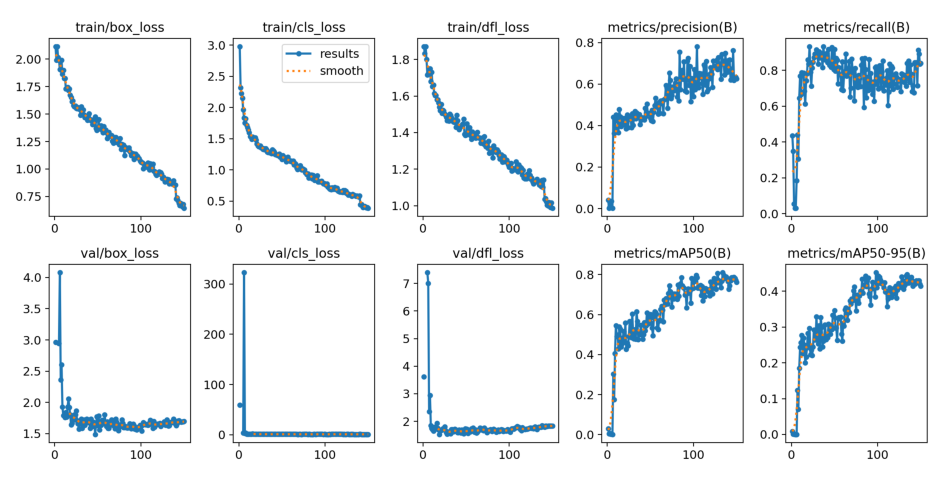

In [63]:
image_path = './runs/detect/final_model/results.png'

img = mpimg.imread(image_path)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')  
plt.show()

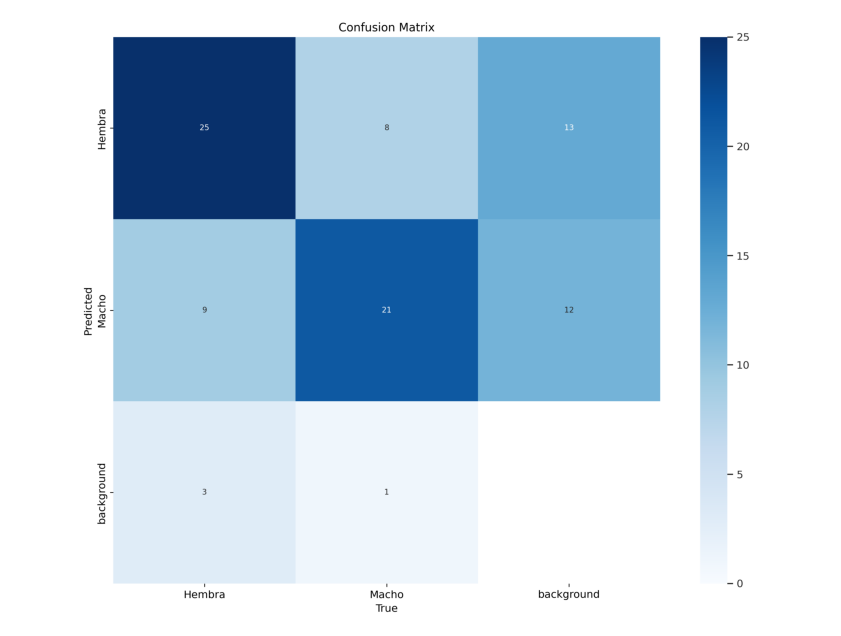

In [64]:
image_path = './runs/detect/final_model/confusion_matrix.png'

img = mpimg.imread(image_path)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')  
plt.show()

In [75]:
results = model.predict(source='/home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/valid/images/IMG_1114_JPG.rf.720d44c0134ebfd53c668485583a8663.jpg', conf=0.5, save=False)


image 1/1 /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/valid/images/IMG_1114_JPG.rf.720d44c0134ebfd53c668485583a8663.jpg: 320x320 2 Hembras, 2 Machos, 34.0ms
Speed: 19.7ms preprocess, 34.0ms inference, 3.0ms postprocess per image at shape (1, 3, 320, 320)


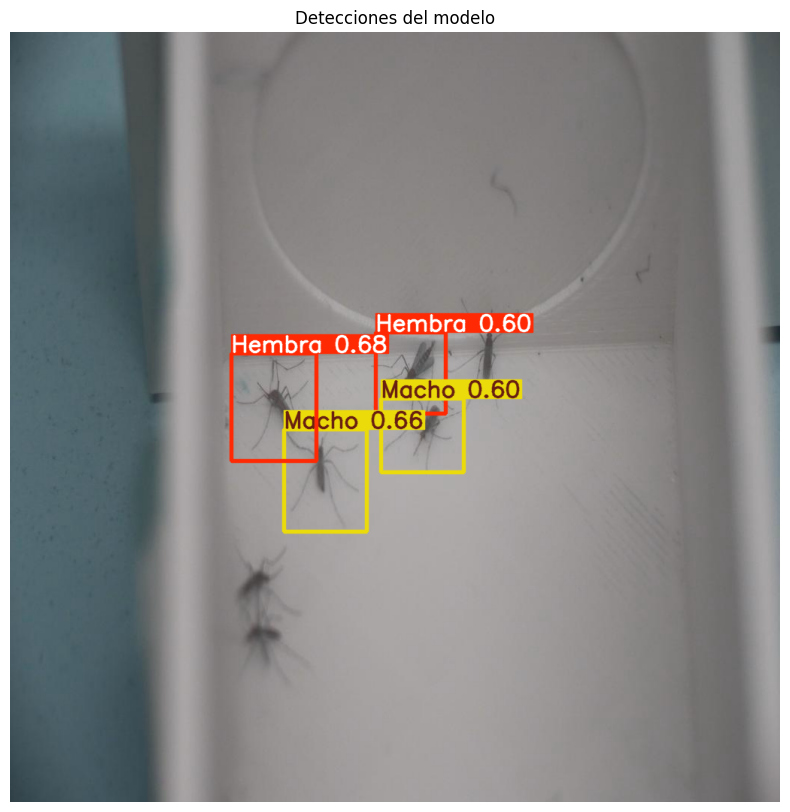

In [76]:
for result in results:
    image = result.plot()  # Genera una imagen con cuadros y etiquetas
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.title("Detecciones del modelo")
    plt.show()

In [80]:
results = model.predict(source='/home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/valid/images/IMG_20240624_162553_657_jpg.rf.33beece9cac5dff5a89b3fe15cff823c.jpg', conf=0.5, save=False)


image 1/1 /home/mosquitos/Documentos/datasets/Clasificador-de-mosquitos-3/valid/images/IMG_20240624_162553_657_jpg.rf.33beece9cac5dff5a89b3fe15cff823c.jpg: 320x320 2 Machos, 32.5ms
Speed: 20.9ms preprocess, 32.5ms inference, 2.8ms postprocess per image at shape (1, 3, 320, 320)


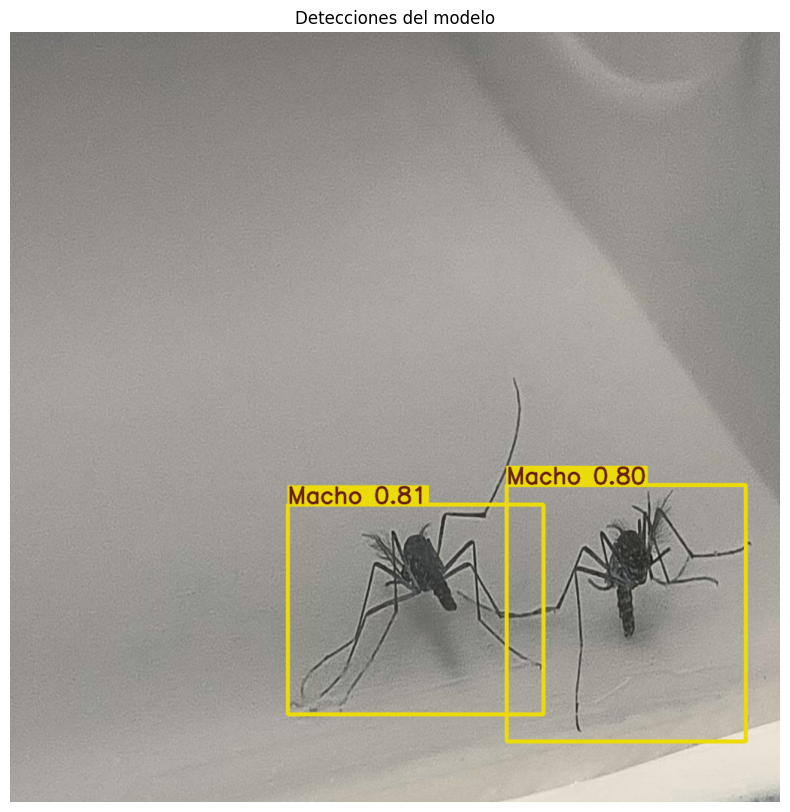

In [81]:
for result in results:
    image = result.plot()  # Genera una imagen con cuadros y etiquetas
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.title("Detecciones del modelo")
    plt.show()